# **MSCA 32018 - NLP Summer 2022**
### **FINAL PROJECT (Google Colab)**
### **ILLINOIS POPULATION NEWS ANALYSIS**
**Author: Akhir Syabani** <br>
**UCID: 12281056**

#### Below is the final version in chronological steps (not including trials of other methods)

### 1. Load the original dataset

In [1]:
import pandas as pd
from pprint import pprint
import re
from tqdm import tqdm
tqdm.pandas()
import numpy as np

In [2]:
df = pd.read_json('https://storage.googleapis.com/msca-bdp-data-open/news/news_final_project.json', orient='records', lines=True) 

In [3]:
df

date language                                              title  \
0      2022-05-29  english  About Greater Chicago Roofing - Wheaton Roof I...   
1      2022-05-29  english  Some Ideas on Greater Chicago Roofing - Naperv...   
2      2022-05-29  english  Greater Chicago Roofing - Wheaton Skylight Rep...   
3      2022-05-29  english  14 injured when boat explodes at marina in Sen...   
4      2022-05-29  english  The Best Guide To Greater Chicago Roofing - Wh...   
...           ...      ...                                                ...   
199937 2022-02-12  english  Projected Lineup: Feb. 12 vs. Chicago - Opera ...   
199938 2022-02-16  english  Domask scores 25 to lead S. Illinois over Brad...   
199939 2022-02-16  english  A Good Reason To Visit Illinois, Stay At The #...   
199940 2022-02-17  english  Prosecutors agree to drop another 19 cases tie...   
199941 2022-02-17  english  Chicago Park District board picks new presiden...   

                                                     text  
0       About Greater Chicago Roofing - Wheaton Roof I...  
1       Some Ideas on Greater Chicago Roofing - Naperv...  
2       All about Greater Chicago Roofing - Wheaton Gu...  
3       SENECA, Illinois - Fourteen people were injure...  
4       What Does Greater Chicago Roofing - Wheaton Gu...  
...                                                   ...  
199937  Jordan Kyrou and Pavel Buchnevich are expected...  
199938  CARBONDALE, Ill. (AP) — Marcus Domask had a se...  
199939  A Good Reason To Visit Illinois, Stay At The #...  
199940  Cook County prosecutors agreed Wednesday to dr...  
199941  A former top aide to now-convicted former Chic...  

[199942 rows x 4 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199942 entries, 0 to 199941
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      199942 non-null  datetime64[ns]
 1   language  199942 non-null  object        
 2   title     199942 non-null  object        
 3   text      199942 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 6.1+ MB


In [5]:
# remove URL (started in '//') and newline (started in '\n') and content-section
df['txt_no_url'] = df['text'].progress_apply(lambda x: re.sub('//[^\n| ]+|\n|\(#content-section.[0-9]\)','',x))

100%|██████████| 199942/199942 [00:13<00:00, 14742.64it/s]


In [6]:
pd.set_option('display.max_colwidth',1000)
df[['text','txt_no_url']].head(2)

text  \
0  About Greater Chicago Roofing - Wheaton Roof Installation\nThe Basic Principles Of Greater Chicago Roofing - Wheaton Skylight Replacement\nTable of Contents [7 Simple Techniques For Greater Chicago Roofing - Wheaton Gutter Replacement](#content-section-0) [Some Known Questions About Wheaton Roofing.](#content-section-1) [The Of Greater Chicago Roofing - Wheaton](#content-section-2) [Getting The Greater Chicago Roofing - Wheaton Roof Installation To Work](#content-section-3) Move automobiles: You'll intend to leave a huge course on your driveway or car park for your roofers to come as well as go with materials. Moving vehicles to the opposite side of the car park or down the road will certainly likewise assist shield them from dropping debris. Determine outlets: One way you can help streamline the process is by recognizing one of the most hassle-free electrical outlets beforehand for your roofing professionals to gain access to for power tools.\n[7 Simple Techniques For Greater Chic...   
1  Some Ideas on Greater Chicago Roofing - Naperville Skylight Replacement You Need To Know\nWhat Does Greater Chicago Roofing - Naperville Roof Replacement Do?\nTable of Contents [Naperville Roofing for Dummies](#content-section-0) [Fascination About Greater Chicago Roofing - Naperville Gutter Installation](#content-section-1) [Excitement About Greater Chicago Roofing - Naperville Metal Roofing](#content-section-2) [The Greatest Guide To Naperville Roofing](#content-section-3) [Examine This Report on Greater Chicago Roofing - Naperville Roof Replacement](#content-section-4) [The Facts About Naperville Roofers Uncovered](#content-section-5) The bottom part of the roofing incline is steeper so that the pitch of the roofing hardly starts. This allows even more space on the within and most of the times creates an added area. Level roof A lot of flat roofings are not really 100% flat, they are low-sloped roofings that show up level, yet have a little bit of an incline to permit the run-of...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                txt_no_url  
0  About Greater Chicago Roofing - Wheaton Roof InstallationThe Basic Principles Of Greater Chicago Roofing - Wheaton Skylight ReplacementTable of Contents [7 Simple Techniques For Greater Chicago Roofing - Wheaton Gutter Replacement] [Some Known Questions About Wheaton Roofing.] [The Of Greater Chicago Roofing - Wheaton] [Getting The Greater Chicago Roofing - Wheaton Roof Installation To Work] Move automobiles: You'll intend to leave a huge course on your driveway or car park for your roofers to come as well as go with materials. Moving vehicles to the opposite side of the car park or down the road will certainly likewise assist shield them from dropping debris. Determine outlets: One way you can help streamline the process is by recognizing one of the most hassle-free electrical outlets beforehand for your roofing professionals to gain access to for power tools.[7 Simple Techniques For Greater Chicago Roofing - Wheaton Gutter Replacement][Some Known Question

### 2. Filtering and Clean-Up: Select Only Relevant Titles

In [7]:
# select titles that contain 'Illinois/Chicago' and 'population'
df_select_title = pd.DataFrame(df[ 
    df['title'].str.contains('Illinois|illinois|Chicago|chicago') &
    df['title'].str.contains('Population|population')
    ])
print('initial no.of articles', len(df))
print('filtered no.of articles', len(df_select_title))
df_select_title.head(2)

initial no.of articles 199942
filtered no.of articles 150


date language  \
308  2022-05-23  english   
2477 2022-04-09  english   

                                                                                                                     title  \
308   New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
2477         Native American population in Chicago grows, stronger community, more truthful history sought throughout city   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         text  \
308   Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University, and after graduation she decided to stay and settle into the bustling Lakeview neighborhood.\nThat put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated [census figures](//www.census.gov/newsroom/press-releases/2022/pes-2020-undercount-overcount-by-state.html) released Thursday. The new estimate stands in contrast to the oft-expressed belief that the state is hemorrhaging people, and matches what Landrum, a 23-year-old market research analyst, has experienced on the North Side.\n“I’m apartment hunting right now and all the decent ones get snapped up in 24 hours,” she said. “It’s so quick. It’s not a sign of people leaving.”\nThe U.S. Census Bureau originally [found](//www.chicagotribune.com/politics/ct-illinois-congress-redistricting-census-20210426-6sxfzcxhmfe2dpokhg5qqnnv4u-story.html) that Illinois lost about 18...   
2477  As Chicago’s Native American population grows, more efforts are underway to build community\nOver the past 10 years, more Chicagoans are identifying as Native American — up from 13,337 in 2010 to 34,543 in 2020, according to a Sun-Times analysis of census data.\nBut Ward, 17, of Homewood, has embraced her ties to the Navajo and Choctaw Nations.\nOn a recent Saturday, she wore a colorful ribbon skirt and a sash identifying her as Miss Indian Chicago as she sang in a crowded gymnasium inside Chicago’s American Indian Center.\nShe uses her title to attend cultural events in hopes of changing popular portrayals of Native Americans.\n“We’re just regular people who are trying to connect back to our land, connect back to our ancestors and make our ancestors proud and make a change for the future that being Native American is something that is very important and very sacred,” Ward said.\nOver the past 10 years, more Chicagoans are identifying as Native American — up from 13,337 in 2010 to ...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [8]:
df_select_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 308 to 199773
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        150 non-null    datetime64[ns]
 1   language    150 non-null    object        
 2   title       150 non-null    object        
 3   text        150 non-null    object        
 4   txt_no_url  150 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 7.0+ KB


### 3. Filtering and Clean-Up: Split & Explode Text into Sentences

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [10]:
df_title_spacy = df_select_title.copy()

In [11]:
# split each text into sentences
df_title_spacy['txt_sent'] = df_select_title['txt_no_url'].progress_apply(lambda x: [sent.text for sent in nlp(x).sents] )

100%|██████████| 150/150 [00:13<00:00, 11.19it/s]


In [12]:
df_title_spacy.head(1)

date language  \
308 2022-05-23  english   

                                                                                                                    title  \
308  New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        text  \
308  Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University, and after graduation she decided to stay and settle into the bustling Lakeview neighborhood.\nThat put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated [census figures](//www.census.gov/newsroom/press-releases/2022/pes-2020-undercount-overcount-by-state.html) released Thursday. The new estimate stands in contrast to the oft-expressed belief that the state is hemorrhaging people, and matches what Landrum, a 23-year-old market research analyst, has experienced on the North Side.\n“I’m apartment hunting right now and all the decent ones get snapped up in 24 hours,” she said. “It’s so quick. It’s not a sign of people leaving.”\nThe U.S. Census Bureau originally [found](//www.chicagotribune.com/politics/ct-illinois-congress-redistricting-census-20210426-6sxfzcxhmfe2dpokhg5qqnnv4u-story.html) that Illinois lost about 18...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  txt_no_url  \
308  Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University, and after graduation she decided to stay and settle into the bustling Lakeview neighborhood.That put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated [census figures]( released Thursday. The new estimate stands in contrast to the oft-expressed belief that the state is hemorrhaging people, and matches what Landrum, a 23-year-old market research analyst, has experienced on the North Side.“I’m apartment hunting right now and all the decent ones get snapped up in 24 hours,” she said. “It’s so quick. It

In [13]:
# explode the dataframe by sentence
df_title_spacy_exp = df_title_spacy.explode('txt_sent')

In [14]:
df_title_spacy_exp.head(1)

date language  \
308 2022-05-23  english   

                                                                                                                    title  \
308  New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        text  \
308  Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University, and after graduation she decided to stay and settle into the bustling Lakeview neighborhood.\nThat put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated [census figures](//www.census.gov/newsroom/press-releases/2022/pes-2020-undercount-overcount-by-state.html) released Thursday. The new estimate stands in contrast to the oft-expressed belief that the state is hemorrhaging people, and matches what Landrum, a 23-year-old market research analyst, has experienced on the North Side.\n“I’m apartment hunting right now and all the decent ones get snapped up in 24 hours,” she said. “It’s so quick. It’s not a sign of people leaving.”\nThe U.S. Census Bureau originally [found](//www.chicagotribune.com/politics/ct-illinois-congress-redistricting-census-20210426-6sxfzcxhmfe2dpokhg5qqnnv4u-story.html) that Illinois lost about 18...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  txt_no_url  \
308  Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University, and after graduation she decided to stay and settle into the bustling Lakeview neighborhood.That put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated [census figures]( released Thursday. The new estimate stands in contrast to the oft-expressed belief that the state is hemorrhaging people, and matches what Landrum, a 23-year-old market research analyst, has experienced on the North Side.“I’m apartment hunting right now and all the decent ones get snapped up in 24 hours,” she said. “It’s so quick. It

In [15]:
df_title_spacy_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 308 to 199773
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3991 non-null   datetime64[ns]
 1   language    3991 non-null   object        
 2   title       3991 non-null   object        
 3   text        3991 non-null   object        
 4   txt_no_url  3991 non-null   object        
 5   txt_sent    3991 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 218.3+ KB


### 4. Checking Data Distribution

In [16]:
print('Article distribution by month Jan-Jul 2022,')
print('exploded by sentences of selected 150 titles:')
pd.to_datetime(df_title_spacy_exp['date']).dt.month.value_counts().sort_index()

Article distribution by month Jan-Jul 2022,
exploded by sentences of selected 150 titles:


1    1073
2     456
3     593
4     283
5    1215
6     147
7     224
Name: date, dtype: int64

In [17]:
df_title_spacy_exp['month'] = pd.to_datetime(df['date']).dt.month

### 5. Filtering & Clean-Up: Remove Duplicates

In [18]:
df_title_spacy_exp1 = df_title_spacy_exp.drop_duplicates(subset='txt_sent', keep='first')

In [19]:
df_title_spacy_exp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2710 entries, 308 to 199773
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2710 non-null   datetime64[ns]
 1   language    2710 non-null   object        
 2   title       2710 non-null   object        
 3   text        2710 non-null   object        
 4   txt_no_url  2710 non-null   object        
 5   txt_sent    2710 non-null   object        
 6   month       2710 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 169.4+ KB


### 6. Sentiment Analysis: Vader Lexicon
Optimized for social media data: https://www.analyticsvidhya.com/blog/2021/01/sentiment-analysis-vader-or-textblob/

In [20]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
df_title_spacy_exp1['vader_result'] = df_title_spacy_exp1['txt_sent'].progress_apply(lambda x: sid.polarity_scores(x))

100%|██████████| 2710/2710 [00:00<00:00, 3378.48it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_title_spacy_exp1['vader_scores'] = df_title_spacy_exp1['vader_result'].progress_apply(lambda x: x['compound'])

100%|██████████| 2710/2710 [00:00<00:00, 469867.46it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_title_spacy_exp1['vader_sentiment'] = np.where(df_title_spacy_exp1['vader_scores']>=0.05, 'pos',
                                                  np.where(df_title_spacy_exp1['vader_scores']<=-0.05,'neg','neu'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_title_spacy_exp1.head(1)

date language  \
308 2022-05-23  english   

                                                                                                                    title  \
308  New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        text  \
308  Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University, and after graduation she decided to stay and settle into the bustling Lakeview neighborhood.\nThat put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated [census figures](//www.census.gov/newsroom/press-releases/2022/pes-2020-undercount-overcount-by-state.html) released Thursday. The new estimate stands in contrast to the oft-expressed belief that the state is hemorrhaging people, and matches what Landrum, a 23-year-old market research analyst, has experienced on the North Side.\n“I’m apartment hunting right now and all the decent ones get snapped up in 24 hours,” she said. “It’s so quick. It’s not a sign of people leaving.”\nThe U.S. Census Bureau originally [found](//www.chicagotribune.com/politics/ct-illinois-congress-redistricting-census-20210426-6sxfzcxhmfe2dpokhg5qqnnv4u-story.html) that Illinois lost about 18...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  txt_no_url  \
308  Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University, and after graduation she decided to stay and settle into the bustling Lakeview neighborhood.That put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated [census figures]( released Thursday. The new estimate stands in contrast to the oft-expressed belief that the state is hemorrhaging people, and matches what Landrum, a 23-year-old market research analyst, has experienced on the North Side.“I’m apartment hunting right now and all the decent ones get snapped up in 24 hours,” she said. “It’s so quick. It

In [25]:
df_title_spacy_exp1['vader_sentiment'].value_counts()

neu    1173
pos     924
neg     613
Name: vader_sentiment, dtype: int64

### 7. Filtering & Clean-Up: Remove Errors/Outliers (Extremely Long, Misposted Titles)

In [26]:
df_title_spacy_exp1['title_length'] = df_title_spacy_exp1['title'].progress_apply(lambda x: len(x.split()))

100%|██████████| 2710/2710 [00:00<00:00, 153370.09it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_title_spacy_exp1['title_length'].value_counts().sort_index(ascending=False)

1569     75
1567      1
368      32
278      66
40       23
34       10
33       30
31        3
29        2
27       28
24       13
23       25
22       47
21      132
20       21
19       97
18      128
17      129
16       96
15      218
14      287
13      127
12      405
11      222
10      157
9        92
8       111
7       108
6         5
5        20
Name: title_length, dtype: int64

In [28]:
df_title_spacy_exp1[['title','txt_no_url']][df_title_spacy_exp1['title_length']==1567]

title  \
14516  Biden ATF’s Valentine’s Day Snitch Message Backfires When Hunter Is Brought Up By Joe Saunders February 14, 2022 at 1:08pm This idea backfired pretty badly. A Bureau of Alcohol, Tobacco and Firearms plan to turn use Valentine’s Day as a hook to get jilted lovers to snitch on ex-significant others took a turn for the worse on Monday after the agency posted a public plea for information about “illegal gun activity.” The response could not have been what the feds were looking for. Advertisement – story continues below Trending: Super Bowl MVP Shares ‘Vision That God Revealed to Me,’ Quotes Bible Verse “Valentine’s Day can still be fun even if you broke up. Do you have information about a former (or current) partner involved in illegal gun activity?” the post asked. “Let us know, and we will make sure it’s a Valentine’s Day to remember!” Advertisement – story continues below Someone at the ATF probably thought it was pretty clever, as did someone at the Biden Justice Department, who re...   

             txt_no_url  
14516  About the author

In [29]:
df_title_spacy_exp2 = df_title_spacy_exp1[df_title_spacy_exp1['title_length']<278]

In [30]:
print(len(df_title_spacy_exp2))
print(df_title_spacy_exp2['vader_sentiment'].value_counts())

2536
neu    1108
pos     875
neg     553
Name: vader_sentiment, dtype: int64


### 8. Filtering & Clean-Up: Remove Punctuations (Additional Column)

In [31]:
#remove punctuation (just in case for further use)
import string
df_title_spacy_exp2['txt_sent_punct'] = df_title_spacy_exp2['txt_sent']\
    .progress_apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

100%|██████████| 2536/2536 [00:00<00:00, 108347.05it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
df_title_spacy_exp2[['txt_sent','txt_sent_punct']].head(1)

txt_sent  \
308  Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University, and after graduation she decided to stay and settle into the bustling Lakeview neighborhood.   

                                                                                                                                                                     txt_sent_punct  
308  Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University and after graduation she decided to stay and settle into the bustling Lakeview neighborhood

### 9. Visualize Word Cloud per Sentiment

In [33]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import collections
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

### Word Cloud for Positive Sentiments

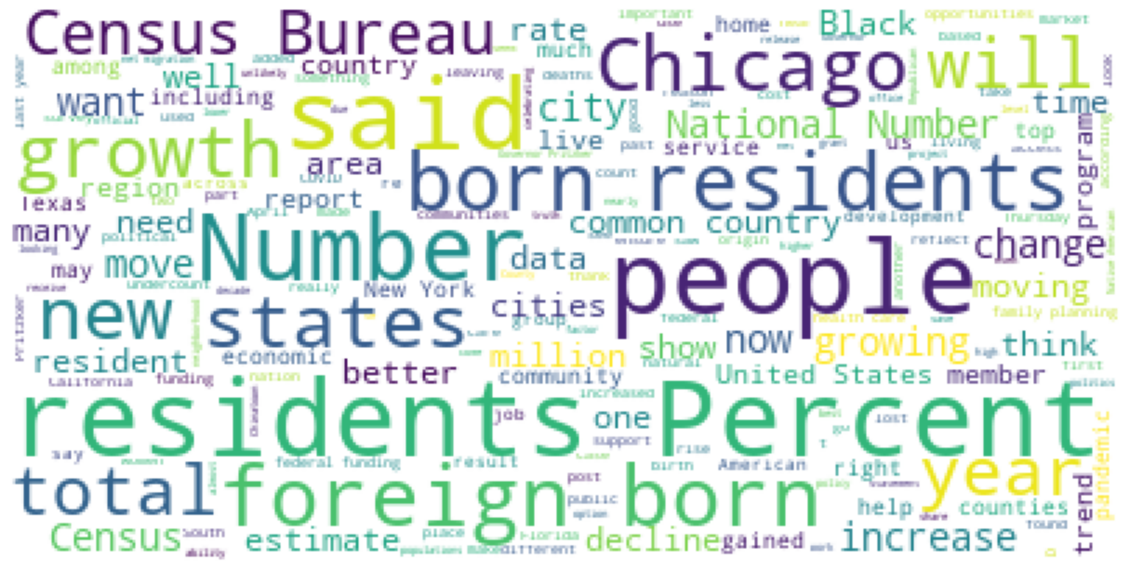

In [35]:
stopwords = list(STOPWORDS) + ['s','u','state','illinois','population']
all_txt_sent_pos = ' '.join(df_title_spacy_exp2['txt_sent'][df_title_spacy_exp2['vader_sentiment']=='pos'])

wc_all_txt_sent_pos = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(all_txt_sent_pos)
rcParams['figure.figsize'] = 20, 40
plt.imshow(wc_all_txt_sent_pos)
plt.axis("off")
plt.show()

In [36]:
sorted(WordCloud(stopwords=stopwords).process_text(all_txt_sent_pos).items(), key=lambda e:e[1], reverse=True)[:30]

[('residents Percent', 114),
 ('people', 110),
 ('said', 103),
 ('Number', 88),
 ('foreign born', 74),
 ('born residents', 74),
 ('Chicago', 66),
 ('new', 65),
 ('states', 64),
 ('growth', 63),
 ('total', 52),
 ('will', 51),
 ('year', 50),
 ('Census Bureau', 42),
 ('National Number', 40),
 ('increase', 39),
 ('city', 39),
 ('now', 38),
 ('Census', 37),
 ('change', 37),
 ('growing', 36),
 ('move', 34),
 ('want', 34),
 ('common country', 33),
 ('time', 31),
 ('think', 30),
 ('need', 30),
 ('resident', 30),
 ('one', 29),
 ('many', 29)]

### Word Cloud for Negative Sentiments

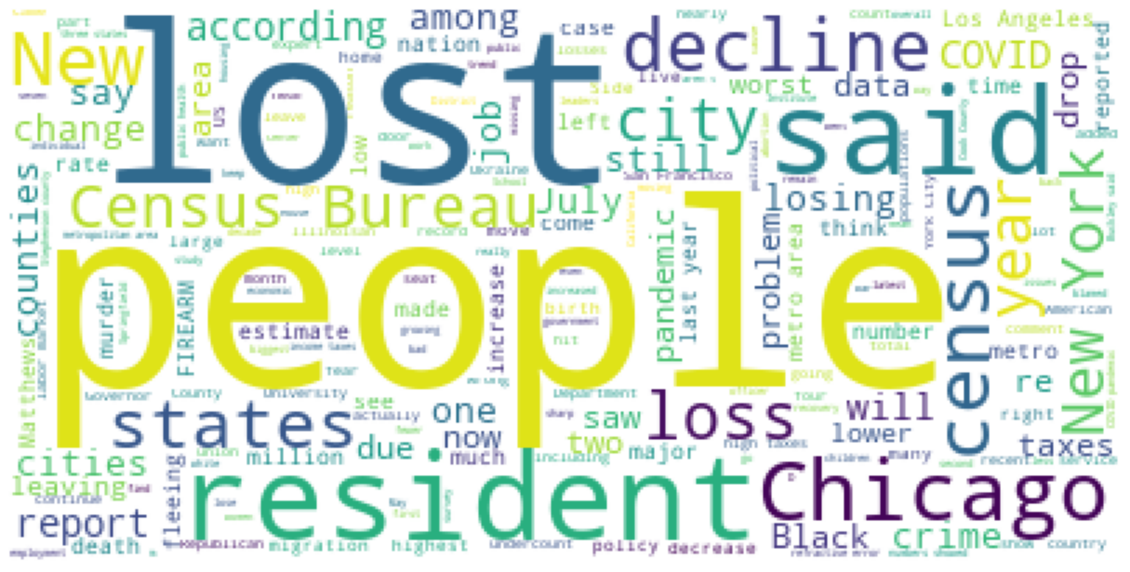

In [37]:
stopwords = list(STOPWORDS) + ['s','u','state','illinois','population']
all_txt_sent_neg = ' '.join(df_title_spacy_exp2['txt_sent'][df_title_spacy_exp2['vader_sentiment']=='neg'])

wc_all_txt_sent_neg = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(all_txt_sent_neg)
rcParams['figure.figsize'] = 20, 40
plt.imshow(wc_all_txt_sent_neg)
plt.axis("off")
plt.show()

In [38]:
sorted(WordCloud(stopwords=stopwords).process_text(all_txt_sent_neg).items(), key=lambda e:e[1], reverse=True)[:30]

[('people', 108),
 ('lost', 78),
 ('resident', 77),
 ('said', 76),
 ('Chicago', 64),
 ('census', 56),
 ('New', 51),
 ('decline', 47),
 ('states', 43),
 ('loss', 36),
 ('year', 33),
 ('city', 30),
 ('Census Bureau', 30),
 ('New York', 29),
 ('according', 28),
 ('report', 26),
 ('COVID', 26),
 ('among', 24),
 ('say', 23),
 ('will', 23),
 ('one', 23),
 ('job', 23),
 ('still', 22),
 ('July', 22),
 ('cities', 22),
 ('losing', 22),
 ('crime', 21),
 ('change', 20),
 ('counties', 20),
 ('taxes', 18)]

### Word Cloud for Neutral Sentiments

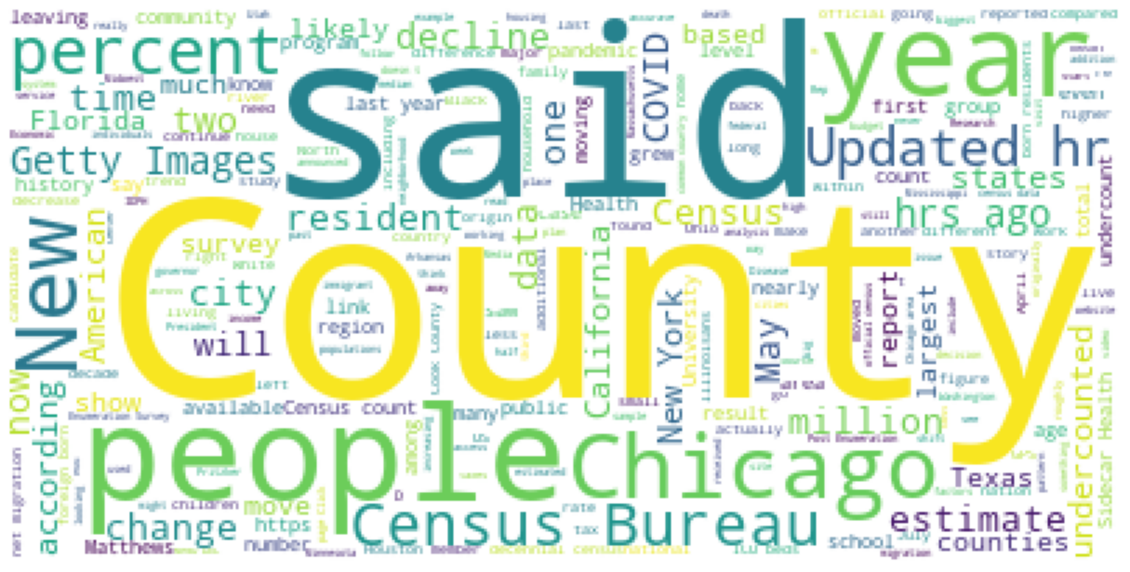

In [39]:
stopwords = list(STOPWORDS) + ['s','u','state','illinois','population']
all_txt_sent_neu = ' '.join(df_title_spacy_exp2['txt_sent'][df_title_spacy_exp2['vader_sentiment']=='neu'])

wc_all_txt_sent_neu = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(all_txt_sent_neu)
rcParams['figure.figsize'] = 20, 40
plt.imshow(wc_all_txt_sent_neu)
plt.axis("off")
plt.show()

In [40]:
sorted(WordCloud(stopwords=stopwords).process_text(all_txt_sent_neu).items(), key=lambda e:e[1], reverse=True)[:30]

[('County', 100),
 ('said', 92),
 ('people', 82),
 ('year', 61),
 ('Chicago', 60),
 ('New', 57),
 ('percent', 48),
 ('Census Bureau', 43),
 ('Updated hr', 43),
 ('Getty Images', 42),
 ('hrs ago', 42),
 ('data', 37),
 ('estimate', 36),
 ('now', 35),
 ('resident', 35),
 ('one', 34),
 ('time', 32),
 ('decline', 31),
 ('May', 31),
 ('COVID', 31),
 ('two', 30),
 ('city', 29),
 ('change', 28),
 ('Census', 27),
 ('million', 27),
 ('according', 24),
 ('undercounted', 24),
 ('states', 23),
 ('American', 23),
 ('California', 23)]

### 10. Finding Major Keywords per Sentiment for Cross-Checking

Keywords to check:

Positive:
1. Growth
2. Growing
3. Grow/grew/grows
4. Increase

Negative:
1. Lost
2. Loss
3. Losing
4. Decline

Neutral:
1. COVID
2. undercounted

Need to examine/observe each particular keyword on its own sentiment group vs. other sentiments and make necessary (manual) adjustments.

In [41]:
df_title_spacy_exp2 = df_title_spacy_exp2.reset_index()

In [42]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('growing')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='pos')]

title  \
10                                                                           New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
34                                                                           New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
84                                                                                  Native American population in Chicago grows, stronger community, more truthful history sought throughout city   
398                                                                                                            Census: Black Population Grows in Suburbs, Shrinks in Cities | Chicago News | WTTW   
438                                                                                                               Illinois undercounted in 2020 census, actually recorded largest population ever   
441                                                                                                               Illinois undercounted in 2020 census, actually recorded largest population ever   
529                                                                                       Gov. Pritzker calls on federal government to consider Illinois population growth when providing funding   
591                                                                                                                         2021 Saw Historic Population Drops in New York, California & Illinois   
600                                                                                                                         2021 Saw Historic Population Drops in New York, California & Illinois   
738                                                                                                   Governor Pritzker Calls on Federal Government to Fund Illinois Based on Population Increase   
784                                                                                               Illinois’ population loss was actually a modest gain, new census figures show – Chicago Tribune   
853                                                                                                                                      Illinois sees eighth straight year of population decline   
970                                                                             ‘The energy of migration has been very high.’ What’s behind the population dip in Chicago, other big U.S. cities?   
1077                                                                                         NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1181                                                                                                              Will Georgia and North Carolina surpass Illinois and Ohio by 2030? (Population)   
1218                                                                                             Illinois sees eighth straight year of population decline | Granite City News | advantagenews.com   
1356                                                                               Chinatown Chicago: Why the ethnic enclave is growing as other cities’ Chinatowns see Asian populations decline   
1360                                                                               Chinatown Chicago: Why the ethnic enclave is growing as other cities’ Chinatowns see Asian populations decline   
1361                                                                               Chinatown Chicago: Why the ethnic enclave is growing as other cities’ Chinatowns see Asian populations decline   
1419                                                                                                           Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area   
1442                                               

In [43]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('growing')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neg')]

title  \
16         New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
628                                                       2021 Saw Historic Population Drops in New York, California & Illinois   
700   After Population Loss Reported, Revised Census Numbers Show Illinois Actually Gained 250K Residents | Chicago News | WTTW   
768                             Illinois’ population loss was actually a modest gain, new census figures show – Chicago Tribune   
1216                           Illinois sees eighth straight year of population decline | Granite City News | advantagenews.com   
1404                                         Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area   
1915      Conflicting population estimates for Illinois continue to spur debate about whether the state is growing or shrinking   
2117                                    Daywatch: Illinois’ population loss was actually a modest gain, new census figures show   

                                                                                                                                                                          txt_sent  \
16    “Our problem is we are not growing as fast as places like Florida and Texas,” said Cynthia Buckley, a sociology professor at the University of Illinois at Urbana-Champaign.   
628                                                           We are now experiencing ever increasing growing pains due to the large number of websites and projects we represent.   
700                                                                                                                      Midwest as a whole is not growing as fast as the Sunbelt.   
768                                        shooting came after a growing sense of unease among city officials who have watched downtown gatherings grow from routine to dangerous.   
1216                          A report from the Illinois Policy Institute highlights Illinois' growing population problem after more than 100,000 citizens left the state in 2021.   
1404                                        Since 2000, Chicago is the slowest growing major city in the U.S. Since its peak in 1950, Chicago has lost nearly 1 million residents.   
1915                       Conflicting population estimates for Illinois continue to spur debate about whether the state is growing or shrinking, as has been estimated for years.   
2117                                   The shooting came after a growing sense of unease among city officials who have watched downtown gatherings grow from routine to dangerous.   

     vader_sentiment  
16               neg  
628              neg  
700              neg  
768              neg  
1216             neg  
1404             neg  
1915             neg  
2117             neg

In [44]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('growing')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')]

title  \
36                             New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
49                             New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
733   New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain | Illinois | gmtoday.com   
851                                                                                        Illinois sees eighth straight year of population decline   
2002                                                                                       Illinois sees eighth straight year of population decline   

                                                                                                                                                                                                                                                                                                                        txt_sent  \
36                                                                                                                                                                                                                                      “We will continue to see contraction (in some areas) but the state is growing,” he said.   
49                                                                                                                                                                    Faustino, 30, who grew up in Palos Heights, made a move against the grain when she returned to the Chicago area last year from fast-growing Austin, Texas.   
733                                                                                                                                                             Carla Faustino, 30, who grew up in Palos Heights, made a move against the grain when she returned to the Chicago area last year from fast-growing Austin, Texas.   
851    A report from the Illinois Policy Institute highlights Illinois’ growing population problem after more than 100,000 citizens left the state in 2021.This was Illinois’ 8th straight year seeing a dip in population, and state lawmakers are calling on changes to the state’s high tax rate to help address the problem.   
2002   A report from the Illinois Policy Institute highlights Illinois' growing population problem after more than 100,000 citizens left the state in 2021.This was Illinois' 8th straight year seeing a dip in population, and state lawmakers are calling on changes to the state's high tax rate to help address the problem.   

     vader_sentiment  
36               neu  
49               neu  
733              neu  
851              neu  
2002             neu

#### 'Growing' is almost a certain positive word. Except when it is paired with negative connotations (slowest growing, growing sense of unease). Some of them incorrectly tagged as neutral while supposed to be negative. Modify accordingly below.

In [45]:
df_title_spacy_exp2['vader_sent_rev'] = df_title_spacy_exp2['vader_sentiment']

In [46]:
df_title_spacy_exp2['vader_sent_rev'].iloc[851] = 'neg'
df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[851]]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


txt_sent  \
851  A report from the Illinois Policy Institute highlights Illinois’ growing population problem after more than 100,000 citizens left the state in 2021.This was Illinois’ 8th straight year seeing a dip in population, and state lawmakers are calling on changes to the state’s high tax rate to help address the problem.   

    vader_sentiment vader_sent_rev  
851             neu            neg

In [47]:
df_title_spacy_exp2['vader_sent_rev'].iloc[2002] = 'neg'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('grow |grows|grew')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='pos')]

title  \
122   Americans ditched high-tax Democrat-run states for low-tax or no-tax havens mostly governed by Republicans during pandemic: Populations shrink in NY, NJ, California, Illinois and spike in Texas, Florida, Carolinas and Big Sky country   
415                                                                                                                                                          Census: Black Population Grows in Suburbs, Shrinks in Cities | Chicago News | WTTW   
479                                                                                             The population of Illinois is growing. The census showed it shrinking. It’s one of six states significantly undercounted in 2020. - MarketWatch   
861                                                                                                                        New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
910                                                                                                                                                                              New report: Illinois’ population undercounted in 2020 census -   
947                                                                                                                                                                             4 Metro Areas in Illinois Gained Population last year, which 4?   
1166                                                                                                                                               Report: Illinois' economy shrinks by $31.4 billion dollars amid continued population decline   
1363                                                                                                                             Chinatown Chicago: Why the ethnic enclave is growing as other cities’ Chinatowns see Asian populations decline   
1380                                                                                                                                             81 of Illinois’ 102 counties lost population in 2021, Cook County lost the 3rd-most nationwide   
1556                                                                                                                                       NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
1940                                                North America Indoor Farming Market Report 2022: Emergence of Urban Population Dwellings in Cities like New York, Chicago, and Milwaukee has Accelerated the Environment for Indoor Farming   
2211                                                                                                                                                                               New report: Illinois' population undercounted in 2020 census   

                                                                                                                                                                                                                                                                                                       txt_sent  \
122                                                                                                                                                                   Florida grew by 211,196 residents while North Carolina saw the country's fourth-highest population growth and added nearly 94,000 people.   
415                                                                                                                                                                                                      The Greater Roseland Chamber of Commerce hopes a community hospital will grow into a medical district.   
479            Arkansas, Tennessee, Mississippi and Illinois respectively had undercounts of 5%, 4.8%, 4.1% and 1.9%, while Florida and Texas respectivel

#### 'Grow/grows/grew' almost all positive but needs to be corrected when it is paired with negative words. Should be negative.
1. Grow + less
2. Unidentified number comparison: shrinking 121k vs. grew 74k

In [49]:
df_title_spacy_exp2['vader_sent_rev'].iloc[1166] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1380] = 'neg'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [50]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('grow |grows|grew')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neg')]

title  \
768                        Illinois’ population loss was actually a modest gain, new census figures show – Chicago Tribune   
863   New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
981      ‘The energy of migration has been very high.’ What’s behind the population dip in Chicago, other big U.S. cities?   
1147                                                        Illinois' population has grown, not declined | dispatchist.com   
1837                  NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
2117                               Daywatch: Illinois’ population loss was actually a modest gain, new census figures show   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 txt_sent  \
768                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               shooting came after a growing sense of unease among city officials who have watched downtown gatherings grow from routine to dangerous.   
863                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [Bail denied to accused shooter and buddy who allegedly took gun in killings near McDonalds on Near](Mon, 23 May 2022 02:00 | Hits : 12 | USIllinois population actually grew by about 250000 between 2010 and 2020 according to updated census figures...   
981                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  DuPage and Lake counties also lost population, while Will and McHenry 

#### 'Grow/grew' correctly classified as negative. Except when it is come from too many negative words within the sentence when it is supposed to be positive.

E.g. innacurate + screwed + actually grew

In [51]:
df_title_spacy_exp2['vader_sent_rev'].iloc[1147] = 'pos'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [52]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('grow |grows|grew')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')]

title  \
1                              New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
49                             New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
61                                    Native American population in Chicago grows, stronger community, more truthful history sought throughout city   
602                                                                           2021 Saw Historic Population Drops in New York, California & Illinois   
627                                                                           2021 Saw Historic Population Drops in New York, California & Illinois   
709   New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain | Illinois | gmtoday.com   
733   New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain | Illinois | gmtoday.com   
807                                                               Census Bureau: Illinois population actually increased in 2020 | 1470 & 100.3 WMBD   
909                                                                                  New report: Illinois’ population undercounted in 2020 census -   
1069                                           NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1137                                                         Dallas vs. Chicago? On jobs, population and housing, the growth story isn't even close   
1237                                                                                      Illinois may have been undercounted and gained population   
1350                                 Chinatown Chicago: Why the ethnic enclave is growing as other cities’ Chinatowns see Asian populations decline   
1373                                                                              US Census admits it undercounted Illinois population by 2 percent   
1467                                                                              New U.S. Census Bureau Report Shows Illinois Population Increased   
1509                                                  Election-year population politics at play in Illinois | Granite City News | advantagenews.com   
1784                                                                 New York, California and Illinois all saw historic population declines in 2021   
2345                                                                                                          Illinois continues to lose population   

                                                                                                                                                                                                                                                                 txt_sent  \
1                                                                                   That put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated [census figures]( released Thursday.   
49                                                                                                             Faustino, 30, who grew up in Palos Heights, made a move against the grain when she returned to the Chicago area last year from fast-growing Austin, Texas.   
61    As Chicago’s Native American population grows, more efforts are underway to build communityOver the past 10 years, more Chicagoans are identifying as Native American — up from 13,337 in 2010 to 34,543 in 2020, according to a Sun-Times analysis of census data.   
602                                                                                                                                                                                                 

#### Most of the 'grow/grows/grew' in neutral need to be corrected to be positive. Few or them are actually negative.

In [53]:
df_title_spacy_exp2['vader_sent_rev'][(df_title_spacy_exp2['txt_sent'].str.contains('influx')) & (df_title_spacy_exp2['vader_sentiment']=='neu')] = 'pos'
df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']][(df_title_spacy_exp2['txt_sent'].str.contains('influx')) & 
                                                                     (df_title_spacy_exp2['vader_sentiment']=='neu')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


txt_sent  \
1                That put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated [census figures]( released Thursday.   
142  New York originally used Castle Garden (now Castle Clinton) as its immigration processing hub, but within a few decades realized that a massive influx of immigrants necessitated a larger venue.   
379                                                                                                                                             Within decades, there was an influx of Black families.   
709                 That put Landrum among the influx of newcomers who helped Illinois’ population grow by about 250,000 between 2010 and 2020, according to updated census figures released Thursday.   

    vader_sentiment vader_sent_rev  
1               neu            pos  
142             neu            pos  
379             neu            pos  
709             neu            pos

In [54]:
df_title_spacy_exp2['vader_sent_rev'].iloc[49] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[61] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[733] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[807] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[909] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[1237] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[1350] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[1373] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[1467] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[1509] = 'pos'
pd.concat([
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[49]],
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[61]],
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[733]],
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[807]],
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[909]],
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[1237]],
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[1350]],
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[1373]],
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[1467]],
    df_title_spacy_exp2[['txt_sent','vader_sentiment','vader_sent_rev']].iloc[[1509]]
],axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


txt_sent  \
49                                                                                                             Faustino, 30, who grew up in Palos Heights, made a move against the grain when she returned to the Chicago area last year from fast-growing Austin, Texas.   
61    As Chicago’s Native American population grows, more efforts are underway to build communityOver the past 10 years, more Chicagoans are identifying as Native American — up from 13,337 in 2010 to 34,543 in 2020, according to a Sun-Times analysis of census data.   
733                                                                                                      Carla Faustino, 30, who grew up in Palos Heights, made a move against the grain when she returned to the Chicago area last year from fast-growing Austin, Texas.   
807                                                                                                                                That means Illinois population likely grew by 250,000, and the state believes it’s now above 13,000,000 for the first time in history.   
909                                                                                               A new report from the U.S. Census Bureau revealed that Illinois ’ population was undercounted in the 2020 Census and the population in fact grew between 2010 and 2020.   
1237                                                              However, if Illinois really was undercounted by 1.97 percent, as the survey suggests, that would have meant that the population actually grew by more than 257,000, putting it at just over 13 million.   
1350                                                                                                                                                                                                                             “Ten years later grew to 18,000 by 2010.   
1373                                                                                                                                       A 2 percent undercount means Illinois grew by about a quarter million rather than shrank by 18,000.[»]Be the first to comment.   
1467                                                                                                                      That means that Illinois’ population grew by nearly 250-thousand people and is now above 13 million people for the first time in state history.   
1509                                                                                                                                                      Gov. J.B. Pritzer’s office said that means the state grew above 13 million for the first time in state history.   

     vader_sentiment vader_sent_rev  
49               neu            pos  
61               neu            pos  
733              neu            pos  
807              neu            pos  
909              neu            pos  
1237             neu            pos  
1350             neu            pos  
1373             neu            pos  
1467             neu            pos  
1509             neu            pos

In [55]:
df_title_spacy_exp2['vader_sent_rev'].iloc[1137] = 'neg'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('growth')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neg')]

title  \
1157                          Report: Illinois' economy shrinks by $31.4 billion dollars amid continued population decline   
1430                                    Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area   
1701                                                            Illinois Metro Areas Lose Population, Move to Other States   
1823                                                               Nearly all Illinois metro areas lost population in 2021   
2335  Jerseyville, Illinois, takes action to revitalize its downtown, aiming for small business growth and population gain   

                                                                                                                                                                                                                                                                                                                                                                                                                        txt_sent  \
1157                                                                                                                                                                                                                                                              decline was already contributing to lower economic growth for Illinois when COVID-19 and government shutdowns piled on and the problems accelerated,” he said.   
1430                                                                                                     Black and Latinx population growth has occurred alongside white population loss in communities located near the city’s borders, such as West Ridge, Belmont Cragin and Ashburn.- The communities with the largest population loss are those where school and public housing developments have closed in recent decades.   
1701  Dallas, Phoenix, Houston, Austin and San Bernardino saw the largest migration gains.• The Peoria, Springfield, Kankakee and Rockford metropolitan areas all ranked among the worst in the nation for population decline, each performing in the bottom 11% of metro areas nationally for population growth.• Danville and Decatur ranked the second- and third-least recovered metros in the state in terms of employment.   
1823                                                                                                                                                                                                       The Peoria, Springfield, Kankakee and Rockford metropolitan areas all ranked among the worst in the nation for population decline, each performing in the bottom 11% of metro areas nationally for population growth.   
2335                                                                                                                         Related Articles In St. Louis' new push for growth, some see an overlooked problem: The Metro East's alarming decline NAACP files lawsuit to block Crestwood TIF, asks Dierbergs for ‘equitable development’ in food deserts instead Juice and smoothie bar to open in Central West End this summer   

     vader_sentiment  
1157             neg  
1430             neg  
1701             neg  
1823             neg  
2335             neg

In [57]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('growth')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')]

title  \
963   ‘The energy of migration has been very high.’ What’s behind the population dip in Chicago, other big U.S. cities?   
2345                                                                              Illinois continues to lose population   
2347                                                                              Illinois continues to lose population   

                                                                                                                                                               txt_sent  \
963                                               “Now, with the impact of the COVID-19 pandemic, this combination has resulted in a historically slow pace of growth.”   
2345  Overall, the Census Bureau said, the U.S. population grew by 444,464, since the 2020 census, or 0.13 percent, the lowest growth rate since the nation’s founding.   
2347                                           “Now, with the impact of the COVID-19 pandemic, this combination has resulted in a historically slow pace of growth.”The   

     vader_sentiment  
963              neu  
2345             neu  
2347             neu

In [58]:
df_title_spacy_exp2['vader_sent_rev'].iloc[963] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[2345] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[963] = 'neg'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [59]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('increase')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neg')]

title  \
363                                                                                                                                   Census: Black Population Grows in Suburbs, Shrinks in Cities | Chicago News | WTTW   
603                                                                                                                                                2021 Saw Historic Population Drops in New York, California & Illinois   
648                                                                                                            Comparing White Bass Recruitment Sources and Population Demographics Among the Large Rivers of Illinois..   
1043                                                                                                                                               Expert explains reasons why Illinois’ population continues to decline   
1045                                                                                                                                               Expert explains reasons why Illinois’ population continues to decline   
1054                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1078                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1558                                                                                                                NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
1835                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1837                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1925                                                                                      Washington group Families for Justice Reform blames Illinois prison population’s rise since 1970s on ‘extreme’ sentencing laws   
2024  The pandemic city exodus revealed: New York, Los Angeles, San Francisco and Chicago lost the most residents with 75% of US counties seeing population decreases - but Dallas, Houston and Austin all saw increases   
2064                                                                                                                                      New York, California and Illinois all saw historic population declines in 2021   
2109                                                                                             City To Conduct Annual Count Of Chicago’s Homeless, And Expects To See Pandemic Spike In Their Population – CBS Chicago   
2333                                                                                                Jerseyville, Illinois, takes action to revitalize its downtown, aiming for small business growth and population gain   
2344                                                                                                                                                                               Illinois continues to lose population   
2350                                                                                                                                                                               Illinois continues to lose population   

                                                                                                                                                                                                                                                          

In [60]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('decline')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='pos')]

title  \
14                                                                                                                         New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
121   Americans ditched high-tax Democrat-run states for low-tax or no-tax havens mostly governed by Republicans during pandemic: Populations shrink in NY, NJ, California, Illinois and spike in Texas, Florida, Carolinas and Big Sky country   
423                                                                                                                                                          Rural Illinois has lost population over the past decade. It’s gained in diversity.   
479                                                                                             The population of Illinois is growing. The census showed it shrinking. It’s one of six states significantly undercounted in 2020. - MarketWatch   
516                                                                                                                                                                             Pritzker promotes false narrative of Illinois population 'boom'   
717                                                                                               New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain | Illinois | gmtoday.com   
744                                                                                                                                                 Governor Pritzker Calls on Federal Government to Fund Illinois Based on Population Increase   
970                                                                                                                           ‘The energy of migration has been very high.’ What’s behind the population dip in Chicago, other big U.S. cities?   
1077                                                                                                                                       NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1081                                                                                                                                       NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1098                                                                                                                                                     Dallas vs. Chicago? On jobs, population and housing, the growth story isn't even close   
1166                                                                                                                                               Report: Illinois' economy shrinks by $31.4 billion dollars amid continued population decline   
1408                                                                                                                                                         Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area   
1428                                                                                                                                                         Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area   
1472                                                                                                                                                                                  How Illinois’ Population Will Change in the Next 20 Years   
1535                                                                                                                                       NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
1565                                                                                                   

In [61]:
df_title_spacy_exp2['vader_sent_rev'][ (df_title_spacy_exp2['txt_sent'].str.contains('decline')) &
                                       (df_title_spacy_exp2['txt_sent'].str.contains('reality it grew')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='pos')] = 'neg'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('decline')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')]

title  \
116   Americans ditched high-tax Democrat-run states for low-tax or no-tax havens mostly governed by Republicans during pandemic: Populations shrink in NY, NJ, California, Illinois and spike in Texas, Florida, Carolinas and Big Sky country   
120   Americans ditched high-tax Democrat-run states for low-tax or no-tax havens mostly governed by Republicans during pandemic: Populations shrink in NY, NJ, California, Illinois and spike in Texas, Florida, Carolinas and Big Sky country   
517                                                                                                                                                                             Pritzker promotes false narrative of Illinois population 'boom'   
518                                                                                                                                                                             Pritzker promotes false narrative of Illinois population 'boom'   
927                                                                                                                                                                                    Pritzker fact check: Illinois population isn’t ‘booming’   
1061                                                                                                                                       NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1235                                                                                                                                                                                  Illinois may have been undercounted and gained population   
1333                                                                                                     Designed to Reduce Cook County Jail Population, Some Say Electronic Monitoring System May Produce False Readings | Chicago News | WTTW   
1383                                                                                                                                                                        These Are The 10 Illinois Cities With The Biggest Population Losses   
1393                                                                                                                                                                        These Are The 10 Illinois Cities With The Biggest Population Losses   
1545                                                                                                                                       NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
1546                                                                                                                                       NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
1552                                                                                                                                       NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
1574                                                                                                                                       NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
1662                                                                                                                                                       81 of 102 Illinois counties lose population in 2021twitterfacebook | dispatchist.com   
1665                                                                                                                                                       81 of 102 Illinois counties lose population in 2021twitterfacebook | dispatchist.com   
1693                                                                                                   

In [63]:
df_title_spacy_exp2['vader_sent_rev'][ (df_title_spacy_exp2['txt_sent'].str.contains('decline')) &
                                       (df_title_spacy_exp2['txt_sent'].str.contains('prosecutorial|COVID-19 patients|Demolitions')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')] = 'neg'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('loss')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='pos')]

title  \
435                                         Illinois undercounted in 2020 census, actually recorded largest population ever   
440                                         Illinois undercounted in 2020 census, actually recorded largest population ever   
1416                                     Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area   
1426                                     Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area   
1444  Illinois Undercounted in 2020 Census, Actually Grew to 13 Million — The State’s Largest Population Ever – NBC Chicago   
2341                                                                                  Illinois continues to lose population   
2362                            Illinois undercounted in 2020 census, actually grew to 13 million — largest population ever   
2365                            Illinois undercounted in 2020 census, actually grew to 13 million — largest population ever   

                                                                                                                                                                                                                                                                                                                                                                                                                txt_sent  \
435                                                                                                                   While the release of Thursday’s report does nothing to reverse that loss of political representation in Washington, the finding that the state actually gained more than 250,000 residents between 2010 and 2020 does give Democrats ammunition to try to shout down many of those talking points.   
440                                                                                                                    "The governor added that he’s looking "forward to celebrating this development with all Illinoisans, including those who routinely badmouth our state" — a shot at Republican rivals who for years have hammered the state’s Democratic leadership over the loss of population in recent decades.   
1416                                                                                                                                                                                                                                                 “School closings and the shutting down of public housing developments occurred in communities that have experienced the greatest population loss in recent decades.   
1426                                                                                                                                                                                                                                                                                                                                        Uneven loss, disparate growth: Population trends across Chicago communities-   
1444                                                                                                                    The governor added that he’s looking “forward to celebrating this development with all Illinoisans, including those who routinely badmouth our state” — a shot at Republican rivals who for years have hammered the state’s Democratic leadership over the loss of population in recent decades.   
2341  According to the data, 122,460 people moved from Illinois to other states during the period from April 1, 2020, to July 1, 2021, while only 5,766 people moved into the state, a net loss of 116,694.Those losses were offset by a net gain of 5,766 people through international migration as well as a “natural” increase of 2,778 people – the difference between in-state births and deaths during the period.   
2362                                                                                      

In [65]:
df_title_spacy_exp2['vader_sent_rev'][ (df_title_spacy_exp2['txt_sent'].str.contains('loss')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='pos')][1:4] = 'neg'

In [66]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('loss')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')]

title  \
597            2021 Saw Historic Population Drops in New York, California & Illinois   
1778  New York, California and Illinois all saw historic population declines in 2021   
2073  New York, California and Illinois all saw historic population declines in 2021   

                                                                                                                                                          txt_sent  \
597   Well, for all three states, the number of people moving to other states on net exceeded each state’s loss in population (as shown in the first table above).   
1778                   Well, in all three states, the number of people who moved to other states exceeded the population loss (as shown in the first table above).   
2073                      Well, in all three states, the number of people moving to other states exceeded the population loss (as shown in the first table above).   

     vader_sentiment  
597              neu  
1778             neu  
2073             neu

In [67]:
df_title_spacy_exp2['vader_sent_rev'][ (df_title_spacy_exp2['txt_sent'].str.contains('loss')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')] ='neg'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('losing')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='pos')]

title  \
465   The population of Illinois is growing. The census showed it shrinking. It’s one of six states significantly undercounted in 2020. - MarketWatch   
570                                                                             2021 Saw Historic Population Drops in New York, California & Illinois   
744                                                       Governor Pritzker Calls on Federal Government to Fund Illinois Based on Population Increase   
1077                                             NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1416                                                               Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area   
1596                                                                       Union power vote, population loss threaten Illinois’ labor market recovery   
1753                                                                   New York, California and Illinois all saw historic population declines in 2021   
2053                                                                   New York, California and Illinois all saw historic population declines in 2021   
2270                                                                                                     Ep. 39: The truth about Illinois’ population   
2298                                                                                                     Ep. 39: The truth about Illinois’ population   

                                                                                                                                                                                                                                                                                                        txt_sent  \
465                                                                                                                                                                                                   In Minnesota and Rhode Island, overcounts appear to have helped save them from losing congressional seats.   
570                                                                                                                           The Biggest LosersThe first interesting observation we can take from the census data is that there are three clear “leading states” that are losing the greatest number of people.   
744                                     The original census count, which inaccurately showed a population decline, resulted in Illinois losing one congressional seat, making accurate appropriation of funds even more essential to ensure Illinoisans can access the resources they need over the next decade.   
1077         ‘Even though over time we’ve seen a higher number of counties with natural decrease and net international migration continuing to decline, in the past year, the contribution of domestic migration counteracted these trends, so there were actually more counties growing than losing population.   
1416                                                                                                                                         “School closings and the shutting down of public housing developments occurred in communities that have experienced the greatest population loss in recent decades.   
1596                                                                                                      Illinois payrolls fared marginally better, losing only 13.5% of the jobs from January-April 2020.Since the recovery began in April 2020, the national economy has added jobs 23% faster than Illinois.   
1753   Being covered by a different tax policy when moving to another state is certainly easier than moving to another country, for example.the biggest losersThe first interesting observation we can take from the Census data is that there are three clear “leading states” that are losing more population.

In [69]:
df_title_spacy_exp2['vader_sent_rev'].iloc[570] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[744] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1590] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1770] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1927] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[2227] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[2472] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[2444] = 'neu'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [70]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('losing')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')]

title  \
616            2021 Saw Historic Population Drops in New York, California & Illinois   
799  Census Bureau: Illinois Was Undercounted, Actually Gained Population Since 2010   
801  Census Bureau: Illinois Was Undercounted, Actually Gained Population Since 2010   

                                                                                                                                      txt_sent  \
616       Lockdowns, documentation mandates, school closings, and other COVID regulations are likely just too cumbersome for some to tolerate.   
799  But now it appears that instead of losing population over the past decade, Illinois actually gained a quarter-of-a-million new residents.   
801    That means that instead of losing 18,000 residents from 2010 to 2020, the state actually gained nearly 250,000 people during that time.   

    vader_sentiment  
616             neu  
799             neu  
801             neu

In [71]:
df_title_spacy_exp2['vader_sent_rev'].iloc[616] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[799] = 'pos'
df_title_spacy_exp2['vader_sent_rev'].iloc[801] = 'pos'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [72]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('lost')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='pos')]

title  \
23     New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
35     New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
345                                      Census: Black Population Grows in Suburbs, Shrinks in Cities | Chicago News | WTTW   
451                                         Illinois undercounted in 2020 census, actually recorded largest population ever   
1055                   NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1380                         81 of Illinois’ 102 counties lost population in 2021, Cook County lost the 3rd-most nationwide   
1454  Illinois Undercounted in 2020 Census, Actually Grew to 13 Million — The State’s Largest Population Ever – NBC Chicago   
1539                   NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
1646                                                                           Illinois' population has grown, not declined   
1721                                                     US Census admits it under-counted Illinois population by 2 percent   
1836                   NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
2374                            Illinois undercounted in 2020 census, actually grew to 13 million — largest population ever   

                                                                                                                                                                                                                                                                                                                                        txt_sent  \
23                                                         While the census downturn reported last year gave the GOP something to crow about and the increase shown in last week’s survey gave Democrats a nice talking point, what will the practical import be of the new numbers?Illinois lost one congressional seat, and that won’t change.   
35                                                                                                                                                              At the same time, he said, it’s clear other areas have lost population, including rural counties, the Metro East region near St. Louis, and the South and West sides of Chicago.   
345                                                                                                                                                                                                                                                             From 1990 to 2000, 13 of the United States’ biggest cities lost Black residents.   
451   "But either way, subsequent statistical sampling from the census, such as Thursday’s determinations of over- and undercounting, can’t be used for reapportioning seats in Congress, thanks to a Supreme Court ruling in 1999.But the new figures will at least help usher in additional federal funding that the state nearly lost out on.   
1055   This map shows some of the cities which gained and lost large chunks of their populations between 2020 and 2021Last year’s trend generally saw residents of more liberal ‘blue’ cities and states move to conservative ‘red’ states, and could lead to traditionally Republican areas turning Democrat thanks to the influx of newcomers.   
1380                                                                                                                                                                                                                            The state’s 81 shrinking counties lost 121,000 people, while the 21 counties that grew gained just 7,400 people.   
1454                                                                                  

In [73]:
df_title_spacy_exp2['vader_sent_rev'].iloc[23] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[345] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1380] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1721] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1836] = 'neg'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [74]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('lost')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')]

Empty DataFrame
Columns: [title, txt_sent, vader_sentiment]
Index: []

In [75]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('COVID')) &
                                                            (df_title_spacy_exp2['vader_sentiment']=='neu')]

title  \
616                                                                                       2021 Saw Historic Population Drops in New York, California & Illinois   
773                                                             Illinois’ population loss was actually a modest gain, new census figures show – Chicago Tribune   
958                                           ‘The energy of migration has been very high.’ What’s behind the population dip in Chicago, other big U.S. cities?   
963                                           ‘The energy of migration has been very high.’ What’s behind the population dip in Chicago, other big U.S. cities?   
1197                                                             COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1207                                                             COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1208                                                             COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1209                                                             COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1213                                                             COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1214                                                             COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1215                                                             COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1504  Expert: We're dealing with even more contagious COVID-19 subvariant, but risk for another disease, monkeypox, is low for overall population - CBS Chicago   
1546                                                       NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
2107                                    City To Conduct Annual Count Of Chicago’s Homeless, And Expects To See Pandemic Spike In Their Population – CBS Chicago   
2119                                                                    Daywatch: Illinois’ population loss was actually a modest gain, new census figures show   
2347                                                                                                                      Illinois continues to lose population   
2383                                                                   COVID-19 hospitalization growth rate slows as Illinois now has 26% of population boosted   
2386                                                                   COVID-19 hospitalization growth rate slows as Illinois now has 26% of population boosted   
2389                                                                   COVID-19 hospitalization growth rate slows as Illinois now has 26% of population boosted   
2391                                                                   COVID-19 hospitalization growth rate slows as Illinois now has 26% of population boosted   
2397                                                                   COVID-19 hospitalization growth rate slows as Illinois now has 26% of population boosted   
2408                                                                   COVID-19 hospitalization growth rate slows as Illinois now has 26% of population boosted   
2412                                                                   COVID-19 hospitalization growth rate slows as Illinois now has 26% of population boosted   
2416                                                                   COVID-19 hospitalization growth rate slows as Illinois now has 26% of population boosted   
2419                                                                   COVID-19

In [76]:
df_title_spacy_exp2['vader_sent_rev'].iloc[616] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[958] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[963] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1546] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[2347] = 'neg'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [77]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('COVID')) &
                                                            (df_title_spacy_exp2['vader_sent_rev']=='pos')]

title  \
145                                                                                                                               What Illinois' immigrant population looked like in 1900 | News | tribuneledgernews.com   
606                                                                                                                                                2021 Saw Historic Population Drops in New York, California & Illinois   
1051                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1199                                                                                                                      COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1200                                                                                                                      COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1203                                                                                                                      COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1210                                                                                                                      COVID-19 UPDATE: Only 1/3 U.S. Population Has Even 1 Booster; 5,344 New Illinois Cases Tuesday   
1535                                                                                                                NY, LA, San Fran, And Chicago Lost The Most Residents With 75%of US Counties Seeing Population Drops   
1838                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
2023  The pandemic city exodus revealed: New York, Los Angeles, San Francisco and Chicago lost the most residents with 75% of US counties seeing population decreases - but Dallas, Houston and Austin all saw increases   
2393                                                                                                                            COVID-19 hospitalization growth rate slows as Illinois now has 26% of population boosted   
2441                                                                                        Only 48 Out of 102 Illinois Counties Monitoring COVID-19 via Wastewater, But 80% of Population Covered | Chicago News | WTTW   
2447                                                                                        Only 48 Out of 102 Illinois Counties Monitoring COVID-19 via Wastewater, But 80% of Population Covered | Chicago News | WTTW   
2451                                                                                        Only 48 Out of 102 Illinois Counties Monitoring COVID-19 via Wastewater, But 80% of Population Covered | Chicago News | WTTW   
2454                                                                                        Only 48 Out of 102 Illinois Counties Monitoring COVID-19 via Wastewater, But 80% of Population Covered | Chicago News | WTTW   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         txt_sent  \
145                                                                                                                                                                                                          

In [78]:
df_title_spacy_exp2['vader_sent_rev'].iloc[606] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1051] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1199] = 'neu'
df_title_spacy_exp2['vader_sent_rev'].iloc[1200] = 'neu'
df_title_spacy_exp2['vader_sent_rev'].iloc[1203] = 'neu'
df_title_spacy_exp2['vader_sent_rev'].iloc[1210] = 'neu'
df_title_spacy_exp2['vader_sent_rev'].iloc[1535] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[1838] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[2003] = 'neg'
df_title_spacy_exp2['vader_sent_rev'].iloc[2393] = 'neu'
df_title_spacy_exp2['vader_sent_rev'].iloc[2441] = 'neu'
df_title_spacy_exp2['vader_sent_rev'].iloc[2447] = 'neu'
df_title_spacy_exp2['vader_sent_rev'].iloc[2451] = 'neu'
df_title_spacy_exp2['vader_sent_rev'].iloc[2454] = 'neu'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [79]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('COVID')) &
                                                            (df_title_spacy_exp2['vader_sent_rev']=='neg')]

title  \
333                                                                                                                               What Illinois' immigrant population looked like in 1900 | News | tribuneledgernews.com   
606                                                                                                                                                2021 Saw Historic Population Drops in New York, California & Illinois   
609                                                                                                                                                2021 Saw Historic Population Drops in New York, California & Illinois   
616                                                                                                                                                2021 Saw Historic Population Drops in New York, California & Illinois   
617                                                                                                                                                2021 Saw Historic Population Drops in New York, California & Illinois   
694                                                                                            After Population Loss Reported, Revised Census Numbers Show Illinois Actually Gained 250K Residents | Chicago News | WTTW   
950                                                                                                    ‘The energy of migration has been very high.’ What’s behind the population dip in Chicago, other big U.S. cities?   
958                                                                                                    ‘The energy of migration has been very high.’ What’s behind the population dip in Chicago, other big U.S. cities?   
963                                                                                                    ‘The energy of migration has been very high.’ What’s behind the population dip in Chicago, other big U.S. cities?   
1051                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1054                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1062                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1067                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1071                                                                                                                NY, LA, San Fran, and Chicago lost the most residents with 75%of US counties seeing population drops   
1155                                                                                                                        Report: Illinois' economy shrinks by $31.4 billion dollars amid continued population decline   
1157                                                                                                                        Report: Illinois' economy shrinks by $31.4 billion dollars amid continued population decline   
1166                                                                                                                        Report: Illinois' economy shrinks by $31.4 billion dollars amid continued population decline   
1187                                                                                                                                               Pope County, Illinois Has One of the Oldest Populations in the Nation   
1201                           

In [80]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('undercounted')) &
                                                            (df_title_spacy_exp2['vader_sent_rev']=='neu')]

title  \
7                              New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
18                             New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
19                             New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
21                             New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
22                             New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
448                                                                 Illinois undercounted in 2020 census, actually recorded largest population ever   
488                                                                                 Pritzker promotes false narrative of Illinois population 'boom'   
712   New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain | Illinois | gmtoday.com   
719   New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain | Illinois | gmtoday.com   
736                                                     Governor Pritzker Calls on Federal Government to Fund Illinois Based on Population Increase   
779                                                 Illinois’ population loss was actually a modest gain, new census figures show – Chicago Tribune   
800                                                                 Census Bureau: Illinois Was Undercounted, Actually Gained Population Since 2010   
806                                                               Census Bureau: Illinois population actually increased in 2020 | 1470 & 100.3 WMBD   
919                                                                                        Pritzker fact check: Illinois population isn’t ‘booming’   
1252                                                                                      Illinois may have been undercounted and gained population   
1369                                                                                      Illinois Population undercounted by 2% in the last census   
1436                                                         Gov Pritzker Calls On Federal Government to Fund Illinois Based on Population Increase   
1465                                                                              New U.S. Census Bureau Report Shows Illinois Population Increased   
1466                                                                              New U.S. Census Bureau Report Shows Illinois Population Increased   
1917                          Conflicting population estimates for Illinois continue to spur debate about whether the state is growing or shrinking   
2358                                                                              New U.S. Census Bureau Report Shows Illinois Population Increased   

                                                                                                                                                                                              txt_sent  \
7     But after a [follow-up survey]( — something that happens after each once-a-decade head count of the U.S. population — it discovered the state’s population figures had likely been undercounted.   
18                                       was the only state in the Midwest to be undercounted, while two other Midwest states — Minnesota and Ohio — were likely overcounted, according to the survey.   
19                                                                                                       Other states that were undercounted were Arkansas, Florida, Mississippi, Tennessee and Texas.   
21         

In [81]:
df_title_spacy_exp2['vader_sent_rev'][ (df_title_spacy_exp2['txt_sent'].str.contains('undercounted')) &
                                                            (df_title_spacy_exp2['vader_sent_rev']=='neu')] = 'pos'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('undercounted')) &
                                                            (df_title_spacy_exp2['vader_sent_rev']=='pos')]

title  \
7                                New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
18                               New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
19                               New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
21                               New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
22                               New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
448                                                                   Illinois undercounted in 2020 census, actually recorded largest population ever   
477   The population of Illinois is growing. The census showed it shrinking. It’s one of six states significantly undercounted in 2020. - MarketWatch   
488                                                                                   Pritzker promotes false narrative of Illinois population 'boom'   
503                                                                                   Pritzker promotes false narrative of Illinois population 'boom'   
712     New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain | Illinois | gmtoday.com   
719     New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain | Illinois | gmtoday.com   
736                                                       Governor Pritzker Calls on Federal Government to Fund Illinois Based on Population Increase   
779                                                   Illinois’ population loss was actually a modest gain, new census figures show – Chicago Tribune   
800                                                                   Census Bureau: Illinois Was Undercounted, Actually Gained Population Since 2010   
806                                                                 Census Bureau: Illinois population actually increased in 2020 | 1470 & 100.3 WMBD   
909                                                                                    New report: Illinois’ population undercounted in 2020 census -   
910                                                                                    New report: Illinois’ population undercounted in 2020 census -   
919                                                                                          Pritzker fact check: Illinois population isn’t ‘booming’   
1223                                                                                        Illinois may have been undercounted and gained population   
1237                                                                                        Illinois may have been undercounted and gained population   
1252                                                                                        Illinois may have been undercounted and gained population   
1369                                                                                        Illinois Population undercounted by 2% in the last census   
1436                                                           Gov Pritzker Calls On Federal Government to Fund Illinois Based on Population Increase   
1465                                                                                New U.S. Census Bureau Report Shows Illinois Population Increased   
1466                                                                                New U.S. Census Bureau Report Shows Illinois Population Increased   
1917                            Conflicting population estimates for Illinois continue to spur debate about whether the state is growing or shrinking   
2211         

In [83]:
df_title_spacy_exp2[['title','txt_sent','vader_sentiment']][ (df_title_spacy_exp2['txt_sent'].str.contains('undercounted')) &
                                                            (df_title_spacy_exp2['vader_sent_rev']=='neg')]

title  \
349                                      Census: Black Population Grows in Suburbs, Shrinks in Cities | Chicago News | WTTW   
461                                         Illinois undercounted in 2020 census, actually recorded largest population ever   
1151                                                         Illinois' population has grown, not declined | dispatchist.com   
1464  Illinois Undercounted in 2020 Census, Actually Grew to 13 Million — The State’s Largest Population Ever – NBC Chicago   
1508                          Election-year population politics at play in Illinois | Granite City News | advantagenews.com   
2380                            Illinois undercounted in 2020 census, actually grew to 13 million — largest population ever   

                                                                                                                                                                                                                                                                                            txt_sent  \
349   Those numbers could vary slightly, as the Census Bureau reported last week that 3.3% of the Black population was undercounted in the 2020 census, a rate higher than in 2010.The official count found that a section of Roseland measuring less than 1 square mile lost 1,600 Black residents.   
461                                                                                                                                          "AdvertisementYoung said it isn’t quite clear how this will generate additional funding and stressed that those undercounted are still most vulnerable.   
1151                                                                                                                                                   Krishnamoorthi again pressed the Census Bureau for answers, this time about why Illinois was so grossly undercounted in the decennial census.   
1464                                                                                                                                                       Young said it isn’t quite clear how this will generate additional funding and stressed that those undercounted are still most vulnerable.   
1508                                                                                                                                                    Last week, the Census said a survey indicates it undercounted Illinois by nearly 2% and found possible counting mistakes in 13 other states.   
2380                                                                                                                                                      ”Young said it isn’t quite clear how this will generate additional funding and stressed that those undercounted are still most vulnerable.   

     vader_sentiment  
349              neg  
461              neg  
1151             neg  
1464             neg  
1508             neg  
2380             neg

In [84]:
df_title_spacy_exp2['vader_sent_rev'].iloc[1508] = 'pos'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### 11. Re-visualize Word Cloud after Sentiment Adjustments
#### Positive Sentiments

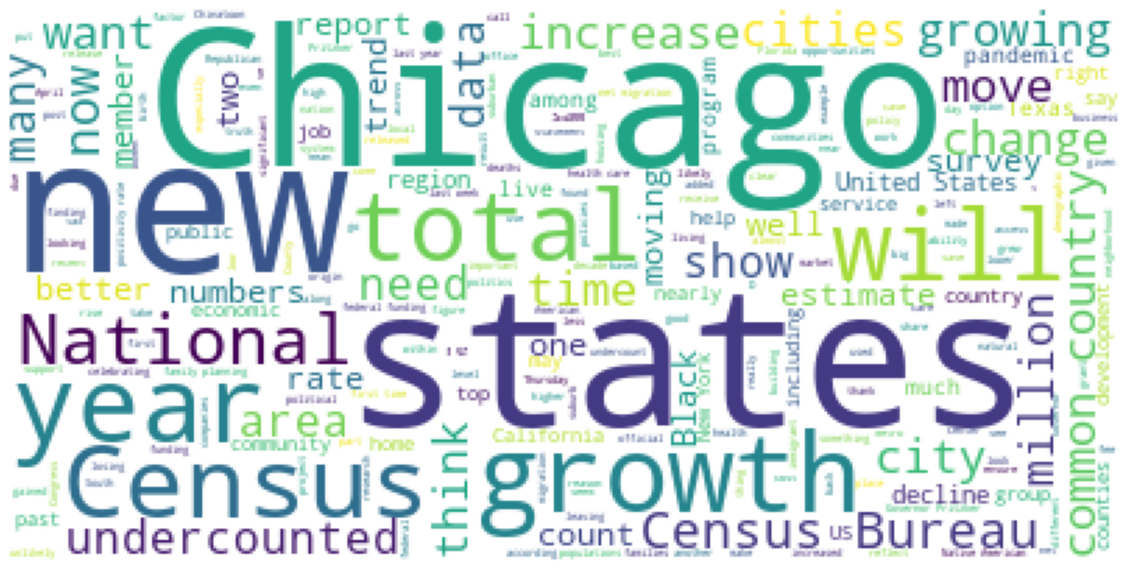

In [85]:
stopwords = list(STOPWORDS) + ['s','u','state','illinois','population','residents','resident','percent','people','said','number','foreign', 'born']
all_txt_sent_pos = ' '.join(df_title_spacy_exp2['txt_sent'][df_title_spacy_exp2['vader_sent_rev']=='pos'])

wc_all_txt_sent_pos = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(all_txt_sent_pos)
rcParams['figure.figsize'] = 20, 40
plt.imshow(wc_all_txt_sent_pos)
plt.axis("off")
plt.show()

In [86]:
sorted(WordCloud(stopwords=stopwords).process_text(all_txt_sent_pos).items(), key=lambda e:e[1], reverse=True)[:20]

[('states', 68),
 ('Chicago', 67),
 ('new', 66),
 ('growth', 62),
 ('year', 59),
 ('Census', 54),
 ('will', 51),
 ('total', 51),
 ('National', 49),
 ('Census Bureau', 45),
 ('now', 43),
 ('city', 38),
 ('growing', 37),
 ('increase', 35),
 ('move', 35),
 ('change', 35),
 ('want', 34),
 ('time', 33),
 ('common country', 33),
 ('undercounted', 32)]

In [87]:
sorted(WordCloud(stopwords=stopwords).process_text(all_txt_sent_pos).items(), key=lambda e:e[1], reverse=True)[21:40]

[('show', 30),
 ('think', 30),
 ('area', 29),
 ('need', 29),
 ('cities', 29),
 ('many', 29),
 ('data', 28),
 ('numbers', 27),
 ('one', 27),
 ('estimate', 26),
 ('survey', 25),
 ('better', 25),
 ('report', 25),
 ('moving', 25),
 ('count', 24),
 ('Black', 24),
 ('rate', 24),
 ('two', 23),
 ('member', 23)]

### 12. Text Observation to Understand the Context and Extract Insights

#### Positive Sentiments

In [88]:
df_title_spacy_exp2['title'][ (df_title_spacy_exp2['vader_sent_rev']=='pos') & (df_title_spacy_exp2['txt_sent'].str.contains('growing'))].unique()[:40]

array(['New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain',
       'Native American population in Chicago grows, stronger community, more truthful history sought throughout city',
       'Census: Black Population Grows in Suburbs, Shrinks in Cities | Chicago News | WTTW',
       'Illinois undercounted in 2020 census, actually recorded largest population ever',
       'Gov. Pritzker calls on federal government to consider Illinois population growth when providing funding',
       '2021 Saw Historic Population Drops in New York, California & Illinois',
       'New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain | Illinois | gmtoday.com',
       'Governor Pritzker Calls on Federal Government to Fund Illinois Based on Population Increase',
       'Illinois’ population loss was actually a modest gain, new census figures show – Chicago Tribune',
       'Illinois

In [89]:
df_title_spacy_exp2['title'][ (df_title_spacy_exp2['vader_sent_rev']=='pos')].unique()[:10]

array(['New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain',
       'Native American population in Chicago grows, stronger community, more truthful history sought throughout city',
       'Americans ditched high-tax Democrat-run states for low-tax or no-tax havens mostly governed by Republicans during pandemic: Populations shrink in NY, NJ, California, Illinois and spike in Texas, Florida, Carolinas and Big Sky country',
       "What Illinois' immigrant population looked like in 1900 | News | tribuneledgernews.com",
       'Census: Black Population Grows in Suburbs, Shrinks in Cities | Chicago News | WTTW',
       'Rural Illinois has lost population over the past decade. It’s gained in diversity.',
       'Illinois undercounted in 2020 census, actually recorded largest population ever',
       'The population of Illinois is growing. The census showed it shrinking. It’s one of six states significantly undercounted in 2020

In [90]:
df_title_spacy_exp2['title'][ (df_title_spacy_exp2['vader_sent_rev']=='pos') & (df_title_spacy_exp2['txt_sent'].str.contains('Black'))].unique()[:10]

array(['Native American population in Chicago grows, stronger community, more truthful history sought throughout city',
       'Census: Black Population Grows in Suburbs, Shrinks in Cities | Chicago News | WTTW',
       'The population of Illinois is growing. The census showed it shrinking. It’s one of six states significantly undercounted in 2020. - MarketWatch',
       'Governor Pritzker Calls on Federal Government to Fund Illinois Based on Population Increase',
       'Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area',
       'Washington group Families for Justice Reform blames Illinois prison population’s rise since 1970s on ‘extreme’ sentencing laws',
       'Black population grows in suburbs, shrinks in cities - Chicago Tribune'],
      dtype=object)

In [91]:
df_title_spacy_exp2['title'][ (df_title_spacy_exp2['vader_sent_rev']=='pos') & (df_title_spacy_exp2['txt_sent'].str.contains('attract'))].unique()

array(['Governor Pritzker Calls on Federal Government to Fund Illinois Based on Population Increase',
       'Illinois’ population loss was actually a modest gain, new census figures show – Chicago Tribune',
       "Dallas vs. Chicago? On jobs, population and housing, the growth story isn't even close",
       'Chinatown Chicago: Why the ethnic enclave is growing as other cities’ Chinatowns see Asian populations decline',
       'Macarthur Foundation, UIC Report Examines Population Shifts in Chicago, Metro Area',
       'Commonwealth Medicine Experts Attend Managed Care Pharmacy Conference in Chicago, Present Key Findings from Pharmacy Research on Massachusetts’ Medicaid (MassHealth) Population | Commonwealth Medicine',
       'Jerseyville, Illinois, takes action to revitalize its downtown, aiming for small business growth and population gain'],
      dtype=object)

In [92]:
df_title_spacy_exp2['txt_sent'][ (df_title_spacy_exp2['vader_sent_rev']=='pos') & (df_title_spacy_exp2['txt_sent'].str.contains('attract'))].unique()

array(['Increased investment by the Pritzker administration in training and apprenticeship programs in manufacturing and aviation have created jobs and attracted new residents across the state.',
       'Police have been left with the challenge of keeping everyone safe in an open park and other areas meant to be attractions in a glittering global city.',
       'Growth itself becomes part of the attraction, ensuring a steady stream of new workers and customers.',
       'A spokeswoman elaborated a bit, saying the D-FW location would help attract and retain talent, and provide access to employees, customers and dealers.',
       'Chinatown in Chicago, like other big city Chinatown communities, captures a culture that attracts tourists and pays respect to the neighborhood’s original residents.',
       'SEE ALSO | Nicole Lee on becoming 1st Asian American woman on Chicago City Council: ‘It’s a big deal’ A century later, Chinatowns across the U.S. are still strongholds for cultural attrac

#### Re-visualizing & Observe Negative Sentiments

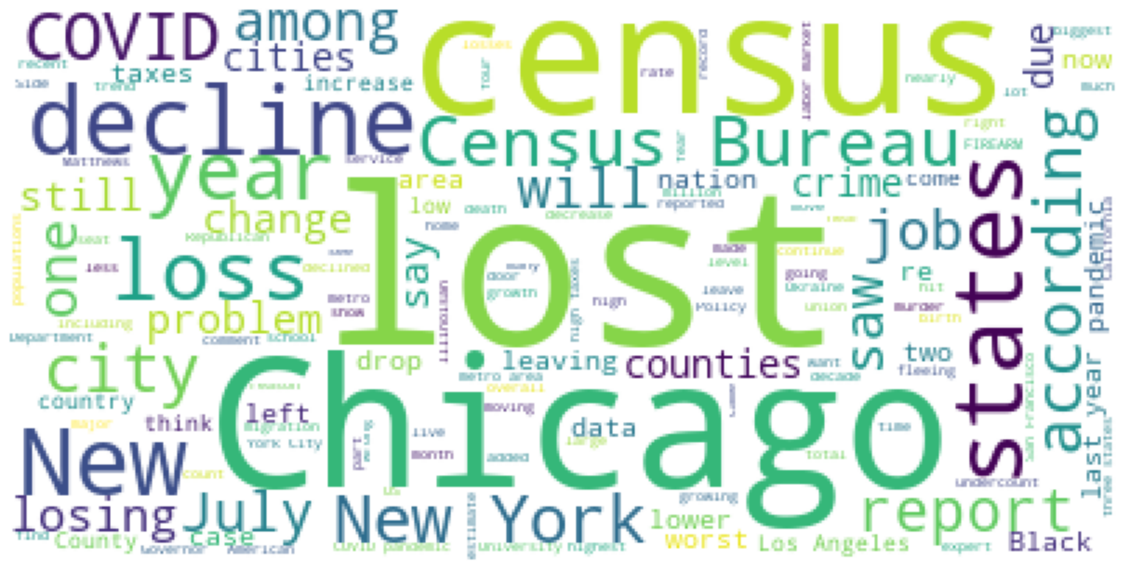

In [93]:
stopwords = list(STOPWORDS) + ['s','u','state','illinois','population','residents','resident','percent','people','said','number']
all_txt_sent_neg = ' '.join(df_title_spacy_exp2['txt_sent'][df_title_spacy_exp2['vader_sent_rev']=='neg'])

wc_all_txt_sent_neg = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(all_txt_sent_neg)
rcParams['figure.figsize'] = 20, 40
plt.imshow(wc_all_txt_sent_neg)
plt.axis("off")
plt.show()

In [94]:
sorted(WordCloud(stopwords=stopwords).process_text(all_txt_sent_neg).items(), key=lambda e:e[1], reverse=True)[:20]

[('lost', 84),
 ('Chicago', 67),
 ('census', 59),
 ('decline', 53),
 ('New', 52),
 ('states', 51),
 ('loss', 39),
 ('year', 37),
 ('Census Bureau', 33),
 ('New York', 31),
 ('city', 30),
 ('COVID', 30),
 ('according', 28),
 ('report', 28),
 ('one', 25),
 ('among', 25),
 ('job', 25),
 ('will', 24),
 ('July', 24),
 ('saw', 24)]

In [95]:
sorted(WordCloud(stopwords=stopwords).process_text(all_txt_sent_neg).items(), key=lambda e:e[1], reverse=True)[21:40]

[('change', 23),
 ('say', 23),
 ('still', 22),
 ('problem', 22),
 ('counties', 22),
 ('due', 21),
 ('crime', 21),
 ('cities', 21),
 ('leaving', 20),
 ('area', 20),
 ('lower', 20),
 ('two', 19),
 ('now', 19),
 ('taxes', 18),
 ('left', 18),
 ('Black', 18),
 ('data', 18),
 ('pandemic', 17),
 ('drop', 17)]

In [96]:
df_title_spacy_exp2['txt_sent'][ (df_title_spacy_exp2['vader_sent_rev']=='neg') & (df_title_spacy_exp2['txt_sent'].str.contains('COVID'))][:10]

333     googletag.cmd.push(function() { googletag.display('ad-1095960'); }); Trending Now Man killed in Cumming Highway crash in Cherokee County Northside Hospital: COVID-19 hospitalizations have surpassed records Human remains found near Kroger in Holly Springs Gas leak causes injuries at Pilgrim's Pride in Canton Canton police officer's wife dies less than two weeks after giving birth Local Events googletag.cmd.push(function() { googletag.display('ad-1095962'); }); Latest e-edition Search Cherokee Tribune Archives googletag.cmd.push(function() { googletag.display('ad-1095965'); }); googletag.cmd.push(function() { googletag.display('ad-1095935'); });
606                                                                                                                                                                                                                                                                                                                                                 

In [97]:
df_title_spacy_exp2['txt_sent'][ (df_title_spacy_exp2['vader_sent_rev']=='neg') & (df_title_spacy_exp2['txt_sent'].str.contains('jobs'))][:10]

363                                                                                                     Their presence increased, meanwhile, in dozens of Chicago suburbs from 2010 to 2020.Chicago residents and demographers offer no shortage of reasons for the urban exodus:— The decline of the steel industry and blue-collar jobs starting in the 1970s.—
427                                                                                                                                                                                                          The exodus is likely caused by, among other things, losing young people to big cities and the loss of agricultural jobs to technology, experts said.
938     It’s easier than explaining support for public policies that created a hostile jobs climate that has Illinois lagging the national recovery, the nation’s second-highest property taxes making houses unaffordable and the nation’s highest state and local tax burden driven by out-of-cont

In [98]:
df_title_spacy_exp2['txt_sent'][ (df_title_spacy_exp2['vader_sent_rev']=='neg') & (df_title_spacy_exp2['txt_sent'].str.contains('taxes'))][:20]

8                                                                                                                                                                                                                                                            The census findings last year showing the population decline underscored a major contention, made mostly by Republicans looking to criticize Illinois’ Democratic government leaders, that people are fleeing the state due in part to high taxes and crime.
38                                                                                                                                                                                                                                                                                                                                                                                 the flight of unhappy expatriates has been [well-documented]( , Buckley said surveys suggest Illinois taxes aren’t driving 

In [99]:
df_title_spacy_exp2['txt_sent'][ (df_title_spacy_exp2['vader_sent_rev']=='neg') & (df_title_spacy_exp2['txt_sent'].str.contains('crime'))][:15]

8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     The census findings last year showing the population decline underscored a major contention, made mostly by Republicans looking to criticize Illinois’ Democratic government leaders, that people are fleeing the state due in part to high taxes and crime.
46                                                                                                                                                                                                   

#### Re-visualizing & Observe Neutral Sentiments

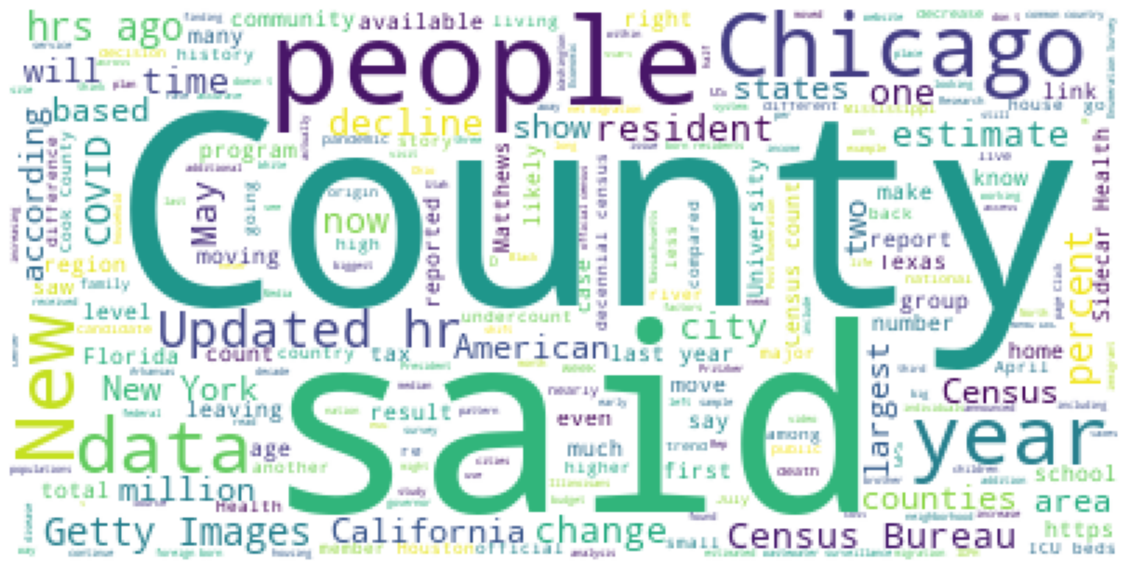

In [100]:
stopwords = list(STOPWORDS) + ['s','u','state','illinois','population']
all_txt_sent_neu = ' '.join(df_title_spacy_exp2['txt_sent'][df_title_spacy_exp2['vader_sent_rev']=='neu'])

wc_all_txt_sent_neu = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(all_txt_sent_neu)
rcParams['figure.figsize'] = 20, 40
plt.imshow(wc_all_txt_sent_neu)
plt.axis("off")
plt.show()

In [101]:
sorted(WordCloud(stopwords=stopwords).process_text(all_txt_sent_neu).items(), key=lambda e:e[1], reverse=True)[:30]

[('County', 100),
 ('said', 90),
 ('people', 74),
 ('Chicago', 64),
 ('year', 56),
 ('New', 55),
 ('data', 44),
 ('Updated hr', 43),
 ('Getty Images', 42),
 ('hrs ago', 42),
 ('percent', 40),
 ('Census Bureau', 37),
 ('COVID', 35),
 ('estimate', 34),
 ('one', 34),
 ('resident', 33),
 ('time', 33),
 ('May', 31),
 ('city', 29),
 ('decline', 29),
 ('now', 27),
 ('change', 27),
 ('two', 24),
 ('American', 23),
 ('Census', 23),
 ('California', 23),
 ('million', 22),
 ('counties', 22),
 ('New York', 22),
 ('will', 21)]

### 12. Topic Detection with ktrain

In [102]:
!pip install ktrain
import ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Topic Detection for Non-Filtered

In [103]:
n_topics = None
all_title = df['title'].tolist()
ktrain_all_title = ktrain.text.get_topic_model(all_title, n_topics=n_topics, n_features=10000)

n_topics automatically set to 316
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.


In [104]:
threshold = None

ktrain_all_title.build(all_title, threshold=threshold)
ktrain_all_title.print_topics(show_counts=True)

done.
topic:110 | count:9376 | white cubs sox game odds picks preview npr predictions prediction
topic:313 | count:6332 | illinois state death loans rep ohio loan payday photo fair
topic:279 | count:6113 | illinois nyse works tool shares itw fund llc retirement municipal
topic:117 | count:5665 | school illinois schools university high mask students college set mandate
topic:51 | count:5525 | com illinois news source liveuamap wsiltv officials latest january updates
topic:17 | count:4905 | bears second coach make nfl ryan head general matt poles
topic:58 | count:4416 | home illinois sale indiana restaurant april hits price homes missouri
topic:151 | count:4409 | bulls nba milwaukee cities bucks pick look lavine twin patrick
topic:298 | count:4159 | illinois watch covid-19 pritzker abortion care insurance auto gov florida
topic:257 | count:4105 | park illinois live wounded united highland injured states video street
topic:296 | count:4022 | new illinois york market update takes western o

#### Topic Detection for Select Titles

In [105]:
n_topics = None

select_title = df_select_title['title'].tolist()
ktrain_title = ktrain.text.get_topic_model(select_title, n_topics=n_topics, n_features=10000)

n_topics automatically set to 8
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.


In [106]:
threshold = 0.55

ktrain_title.build(select_title, threshold=threshold)
ktrain_title.print_topics(show_counts=True)

done.
topic:0 | count:11 | new census actually chicago continues gain modest figures americans signs
topic:6 | count:7 | new york saw california drops historic census shrinking chicago growing


#### Topic Detection on Final List (Fully Filtered)

In [107]:
n_topics = None

select_title2 = df_title_spacy_exp2['title'].unique().tolist()
ktrain_title2 = ktrain.text.get_topic_model(select_title2, n_topics=n_topics, n_features=10000)

n_topics automatically set to 7
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.


In [108]:
threshold = 0.4

ktrain_title2.build(select_title2, threshold=threshold)
ktrain_title2.print_topics(show_counts=True)

done.
topic:3 | count:7 | new census modest gain actually signs figures experts change warning
topic:6 | count:5 | chicago new york historic drops saw census counties wttw city


### 13. Entity Recognition

In [109]:
ssm = spacy.load('en_core_web_sm')
#smd = spacy.load('en_core_web_md')
#slg = spacy.load('en_core_web_lg')

In [110]:
def ner_spacy(string):
    doc = nlp(string)
    
    entities = []
    labels = []
    
    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
    
    entities_labels = list(zip(entities, labels))
    entities_df = pd.DataFrame(entities_labels)
    entities_df.columns = ["Entities", "Labels"]
    
    return entities_df

def ner_spacy_labels(string):
    doc = nlp(string)
    labels = []

    if len(doc.ents) < 1:
      return []
    
    else:
      for ent in doc.ents:
        labels.append(ent.label_)
    return np.unique(labels).tolist()

def ner_spacy_ORG(string):
    doc = nlp(string)
    entities = []
    labels = []
    
    if len(doc.ents) < 1:
      return []
    
    else:
      for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        entities_labels = list(zip(entities, labels))
        entities_df = pd.DataFrame(entities_labels)
        entities_df.columns = ["Entities", "Labels"]
      return entities_df['Entities'][entities_df['Labels']=='ORG'].sort_values().unique().tolist()

def ner_spacy_PERSON(string):
    doc = nlp(string)
    entities = []
    labels = []
    
    if len(doc.ents) < 1:
      return []
    
    else:
      for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        entities_labels = list(zip(entities, labels))
        entities_df = pd.DataFrame(entities_labels)
        entities_df.columns = ["Entities", "Labels"]
      return entities_df['Entities'][entities_df['Labels']=='PERSON'].sort_values().unique().tolist()

def ner_spacy_NORP(string):
    doc = nlp(string)
    entities = []
    labels = []
    
    if len(doc.ents) < 1:
      return []
    
    else:
      for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        entities_labels = list(zip(entities, labels))
        entities_df = pd.DataFrame(entities_labels)
        entities_df.columns = ["Entities", "Labels"]
      return entities_df['Entities'][entities_df['Labels']=='NORP'].sort_values().unique().tolist()

def ner_spacy_LOC(string):
    doc = nlp(string)
    entities = []
    labels = []
    
    if len(doc.ents) < 1:
      return []
    
    else:
      for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        entities_labels = list(zip(entities, labels))
        entities_df = pd.DataFrame(entities_labels)
        entities_df.columns = ["Entities", "Labels"]
      return entities_df['Entities'][entities_df['Labels']=='LOC'].sort_values().unique().tolist()

def ner_spacy_FAC(string):
    doc = nlp(string)
    entities = []
    labels = []
    
    if len(doc.ents) < 1:
      return []
    
    else:
      for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        entities_labels = list(zip(entities, labels))
        entities_df = pd.DataFrame(entities_labels)
        entities_df.columns = ["Entities", "Labels"]
      return entities_df['Entities'][entities_df['Labels']=='FAC'].sort_values().unique().tolist()

def ner_spacy_GPE(string):
    doc = nlp(string)
    entities = []
    labels = []
    
    if len(doc.ents) < 1:
      return []
    
    else:
      for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)
        entities_labels = list(zip(entities, labels))
        entities_df = pd.DataFrame(entities_labels)
        entities_df.columns = ["Entities", "Labels"]
      return entities_df['Entities'][entities_df['Labels']=='GPE'].sort_values().unique().tolist()


#### Entity Recognition from All Texts

In [111]:
all_sentences = ' '.join(df_title_spacy_exp2['txt_sent'])

In [112]:
nlp = ssm
ssm_sentences = ner_spacy(all_sentences)

In [113]:
ssm_sentences

Entities       Labels
0                                  Brooke Landrum       PERSON
1                                         Chicago          GPE
2                                      Cincinnati          GPE
3                                            2016         DATE
4                               Loyola University          ORG
...                                           ...          ...
5886                         Their Failed Schools  WORK_OF_ART
5887  Predatory/Regressive Traffic Camera Rackets          ORG
5888                                            3     CARDINAL
5889                                        first      ORDINAL
5890                                          two     CARDINAL

[5891 rows x 2 columns]

In [114]:
ssm_sentences['Labels'].value_counts()

GPE            1593
ORG             997
DATE            878
CARDINAL        839
PERSON          585
PERCENT         252
NORP            217
MONEY           157
LOC             109
ORDINAL         106
TIME             54
FAC              26
WORK_OF_ART      23
LAW              23
PRODUCT          18
QUANTITY          7
EVENT             5
LANGUAGE          2
Name: Labels, dtype: int64

In [115]:
ssm_sentences[ssm_sentences['Labels']=='ORG'].value_counts()[:30]

Entities                       Labels
the U.S. Census Bureau         ORG       25
the Census Bureau              ORG       19
ICU                            ORG       17
Congress                       ORG       15
Sidecar Health                 ORG       14
GOP                            ORG       12
Buckley                        ORG       11
The Census Bureau              ORG       11
White Bass                     ORG       10
PES                            ORG       10
the Census Bureau’s            ORG        9
U.S. Census Bureau             ORG        9
Caterpillar                    ORG        8
the Illinois Policy Institute  ORG        8
the US Census Bureau           ORG        8
House                          ORG        8
D-FW                           ORG        8
the 2020 Census                ORG        7
IRS                            ORG        7
Bettmann //                    ORG        7
State                          ORG        7
Census Bureau                  ORG    

In [116]:
ssm_sentences[ssm_sentences['Labels']=='PERSON'].value_counts()[:30]

Entities               Labels
Pritzker               PERSON    29
Weinberg               PERSON    10
https                  PERSON    10
JB Pritzker            PERSON     9
J.B. Pritzker          PERSON     9
Biden                  PERSON     6
Wu                     PERSON     6
Irvin                  PERSON     6
Joe Biden              PERSON     5
Don Harmon             PERSON     5
Elon Musk              PERSON     5
Austin                 PERSON     5
Richard Irvin          PERSON     5
Jesse Sullivan         PERSON     4
White Bass             PERSON     4
Twitter                PERSON     4
Bryce Hill             PERSON     4
Darren Bailey          PERSON     4
Gary Rabine            PERSON     4
Stephenson county      PERSON     4
Cynthia Buckley        PERSON     4
IL                     PERSON     3
Jay Young              PERSON     3
Donald Trump           PERSON     3
Dtl                    PERSON     3
Emanuel "Chris" Welch  PERSON     3
Follett                PERSON     

In [117]:
ssm_sentences[ssm_sentences['Labels']=='NORP'].value_counts()[:30]

Entities          Labels
Illinoisans       NORP      31
Americans         NORP      26
Republican        NORP      20
American          NORP      13
Democrats         NORP      13
Native American   NORP      11
Democratic        NORP      10
Democrat          NORP       9
Republicans       NORP       8
New Yorkers       NORP       6
Native Americans  NORP       6
Chinese           NORP       5
Californians      NORP       5
Asian             NORP       4
Russian           NORP       3
Chicagoans        NORP       3
Asian American    NORP       3
Roseland          NORP       2
Russians          NORP       2
Ranch             NORP       2
Schimpf           NORP       2
Southern          NORP       2
African American  NORP       2
Hispanic          NORP       2
Dutch             NORP       2
Black             NORP       2
Illinoians        NORP       1
Black Chicagoans  NORP       1
anti-LGBTQ        NORP       1
anti-Chinese      NORP       1
dtype: int64

In [118]:
ssm_sentences[ssm_sentences['Labels']=='LOC'].value_counts()[:20]

Entities                Labels
South                   LOC       13
Midwest                 LOC       13
Black                   LOC       13
Congressional District  LOC        4
Europe                  LOC        4
Silicon Valley          LOC        3
West                    LOC        3
Northeast               LOC        3
the South West          LOC        3
the North Side          LOC        2
Asia                    LOC        2
Goose Island            LOC        2
North Texas             LOC        2
World                   LOC        2
Southwest               LOC        2
Change Illinois         LOC        2
Sunbelt                 LOC        1
South Holland           LOC        1
South Shore             LOC        1
South Side              LOC        1
dtype: int64

In [119]:
ssm_sentences[ssm_sentences['Labels']=='FAC'].value_counts()[:20]

Entities                                Labels
The Center Square                       FAC       3
Millennium Park                         FAC       3
Minnesota Historical                    FAC       2
the Golden State                        FAC       2
Illinois Saw Historic Population Drops  FAC       2
metro                                   FAC       2
the Field Museum                        FAC       1
the City Center Plaza                   FAC       1
Ukraine Watch                           FAC       1
The Metro East's                        FAC       1
Castle Garden                           FAC       1
Center Square                           FAC       1
Las Colinas                             FAC       1
Lake                                    FAC       1
Cumming Highway                         FAC       1
City Center                             FAC       1
Center Square Expert                    FAC       1
the Wooden Award                        FAC       1
dtype: int64

In [120]:
ssm_sentences[ssm_sentences['Labels']=='PRODUCT'].value_counts()[:20]

Entities                                                     Labels 
Twitter                                                      PRODUCT    4
GRAMS||5||AGG                                                PRODUCT    2
16 Jolly Summer                                              PRODUCT    1
Africa Updated                                               PRODUCT    1
Autorefraction in Children                                   PRODUCT    1
DUI/3||1||AGG DUI/6+||1||AGG DUI/DEATH OF ANOTHER||1||ARMED  PRODUCT    1
Defend Life                                                  PRODUCT    1
Endless Energy Sports                                        PRODUCT    1
Englewood First Responders                                   PRODUCT    1
Fortune                                                      PRODUCT    1
I-72                                                         PRODUCT    1
Illinoisan                                                   PRODUCT    1
REALITY                                    

In [121]:
df_title_spacy_exp2['Entities_Types'] = None
df_title_spacy_exp2['Entities_Types'] = df_title_spacy_exp2['txt_sent'].progress_apply(lambda x: ner_spacy_labels(str(x)))

df_title_spacy_exp2['Entities_ORG'] = None
df_title_spacy_exp2['Entities_ORG'] = df_title_spacy_exp2['txt_sent'].progress_apply(lambda x: ner_spacy_ORG(str(x)))

df_title_spacy_exp2['Entities_NORP'] = None
df_title_spacy_exp2['Entities_NORP'] = df_title_spacy_exp2['txt_sent'].progress_apply(lambda x: ner_spacy_NORP(str(x)))

df_title_spacy_exp2['Entities_PERSON'] = None
df_title_spacy_exp2['Entities_PERSON'] = df_title_spacy_exp2['txt_sent'].progress_apply(lambda x: ner_spacy_PERSON(str(x)))

df_title_spacy_exp2['Entities_LOC'] = None
df_title_spacy_exp2['Entities_LOC'] = df_title_spacy_exp2['txt_sent'].progress_apply(lambda x: ner_spacy_LOC(str(x)))

df_title_spacy_exp2['Entities_FAC'] = None
df_title_spacy_exp2['Entities_FAC'] = df_title_spacy_exp2['txt_sent'].progress_apply(lambda x: ner_spacy_FAC(str(x)))

df_title_spacy_exp2['Entities_GPE'] = None
df_title_spacy_exp2['Entities_GPE'] = df_title_spacy_exp2['txt_sent'].progress_apply(lambda x: ner_spacy_GPE(str(x)))

100%|██████████| 2536/2536 [00:26<00:00, 94.52it/s]


In [122]:
df_title_spacy_exp2[['txt_sent','Entities_Types','Entities_ORG','Entities_NORP','Entities_PERSON', 'Entities_LOC', 'Entities_FAC', 'Entities_GPE']][0:1]

txt_sent  \
0  Brooke Landrum came to Chicago from Cincinnati in 2016 to attend Loyola University, and after graduation she decided to stay and settle into the bustling Lakeview neighborhood.   

             Entities_Types                   Entities_ORG Entities_NORP  \
0  [DATE, GPE, ORG, PERSON]  [Lakeview, Loyola University]            []   

    Entities_PERSON Entities_LOC Entities_FAC           Entities_GPE  
0  [Brooke Landrum]           []           []  [Chicago, Cincinnati]

### 14. Visualizing Sentiment Over Time: by Proportion (%)

In [123]:
sentiment_count = pd.DataFrame(df_title_spacy_exp2.groupby(['month','vader_sent_rev']).size().unstack())
sentiment_count

vader_sent_rev  neg  neu  pos
month                        
1               104  283  234
2                32   72   41
3               162  215  160
4                50   86   73
5               181  290  286
6                27   56   59
7                27   62   36

In [124]:
sentiment_count['neg_pct'] = round(sentiment_count['neg'] / (sentiment_count['neg']+sentiment_count['pos'])*100,0)
sentiment_count['pos_pct'] = round(sentiment_count['pos'] / (sentiment_count['neg']+sentiment_count['pos'])*100,0)
sentiment_count['neg_pct'] = sentiment_count['neg_pct'].astype('int')
sentiment_count['pos_pct'] = sentiment_count['pos_pct'].astype('int')
sentiment_count

vader_sent_rev  neg  neu  pos  neg_pct  pos_pct
month                                          
1               104  283  234       31       69
2                32   72   41       44       56
3               162  215  160       50       50
4                50   86   73       41       59
5               181  290  286       39       61
6                27   56   59       31       69
7                27   62   36       43       57

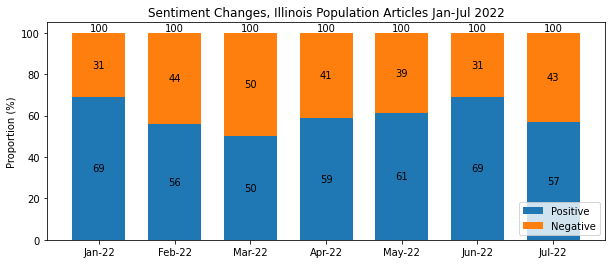

In [125]:
N = 7
ind = np.arange(N)
labels = ['Jan-22','Feb-22','Mar-22','Apr-22','May-22','Jun-22','Jul-22']
positive = sentiment_count['pos_pct'].tolist()
negative = sentiment_count['neg_pct'].tolist()
width = 0.7     # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

fig.set_size_inches(10, 4)

p1 = ax.bar(ind, positive, width, label='Positive')
p2 = ax.bar(ind, negative, width,
            bottom=positive, label='Negative')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Proportion (%)')
ax.set_title('Sentiment Changes, Illinois Population Articles Jan-Jul 2022')
ax.set_xticks(ind, labels)
ax.legend(loc='lower right')

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()

### 14. Visualizing Sentiment Over Time: by Count

In [126]:
pos_by_date = pd.DataFrame(pd.to_datetime(df_title_spacy_exp2[df_title_spacy_exp2['vader_sent_rev']=='pos']['date']).value_counts()).rename(columns={'date':'count'})
pos_by_date.index = pd.to_datetime(pos_by_date.index)
pos_by_date = pos_by_date.sort_index()
pos_by_date.head()

count
2022-01-06      3
2022-01-08      3
2022-01-10     26
2022-01-14      5
2022-01-15     44

In [127]:
neg_by_date = pd.DataFrame(pd.to_datetime(df_title_spacy_exp2[df_title_spacy_exp2['vader_sent_rev']=='neg']['date']).value_counts()).rename(columns={'date':'count'})
neg_by_date.index = pd.to_datetime(neg_by_date.index)
neg_by_date = neg_by_date.sort_index()
neg_by_date.head()

count
2022-01-06      5
2022-01-08      2
2022-01-10     27
2022-01-14      4
2022-01-15     25

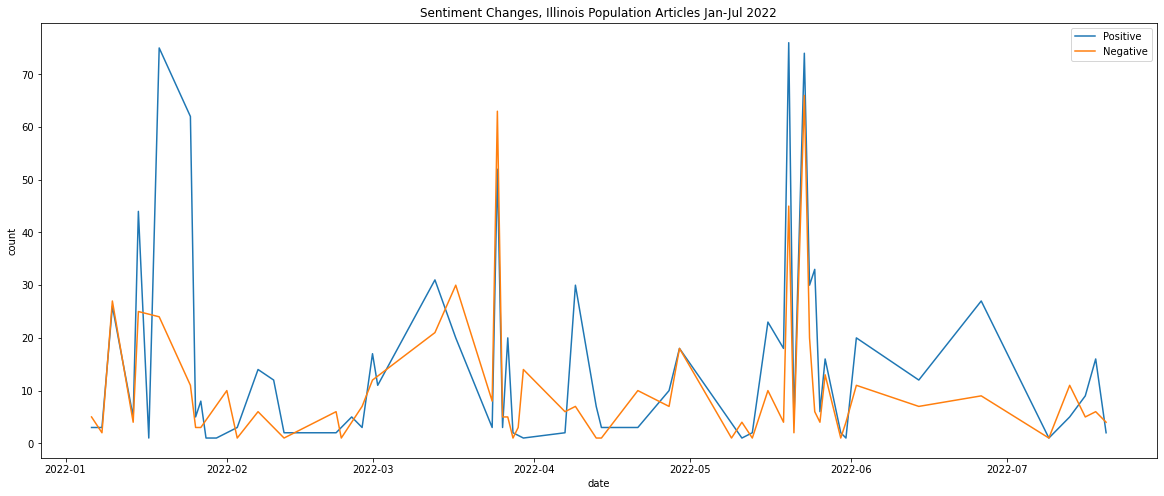

In [128]:
plt.figure(figsize=(20,8))
plt.plot(pos_by_date.index, pos_by_date['count'], label='Positive')
plt.plot(neg_by_date.index, neg_by_date['count'], label='Negative')
plt.xlabel('date')
plt.ylabel('count')
plt.legend()
plt.title('Sentiment Changes, Illinois Population Articles Jan-Jul 2022')
plt.show()

### 15. Visualizing World Cloud of Entities based on All Texts

#### Organizations

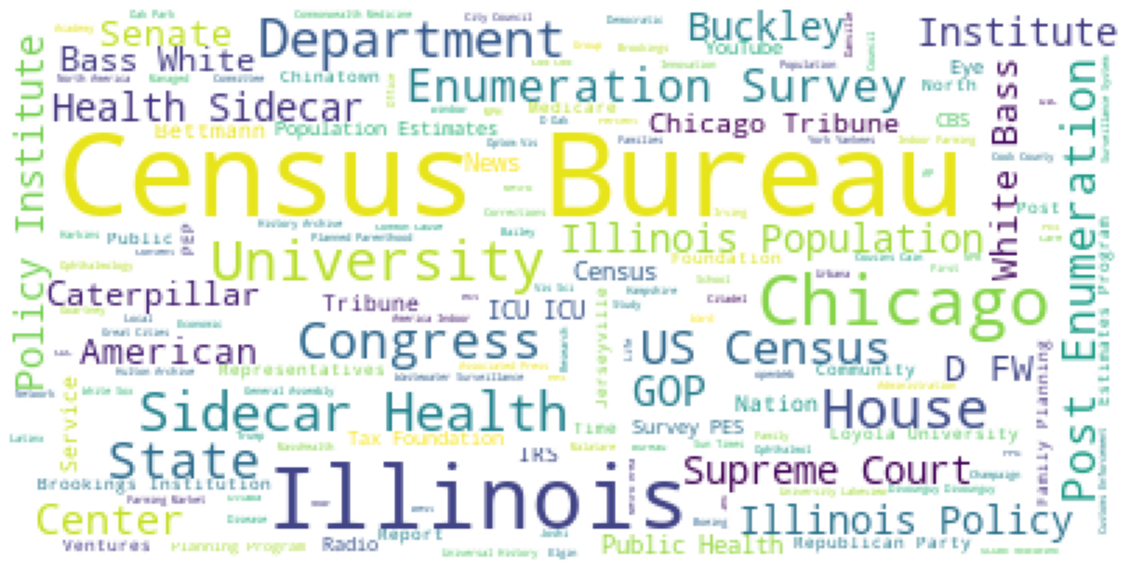

In [129]:
stopwords = list(STOPWORDS) + ['updated', 'u','s','new']
ent_org = ' '.join(ssm_sentences['Entities'][ssm_sentences['Labels']=='ORG'])

ent_org_wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(ent_org)
rcParams['figure.figsize'] = 20, 40
plt.imshow(ent_org_wc)
plt.axis("off")
plt.show()

#### Persons

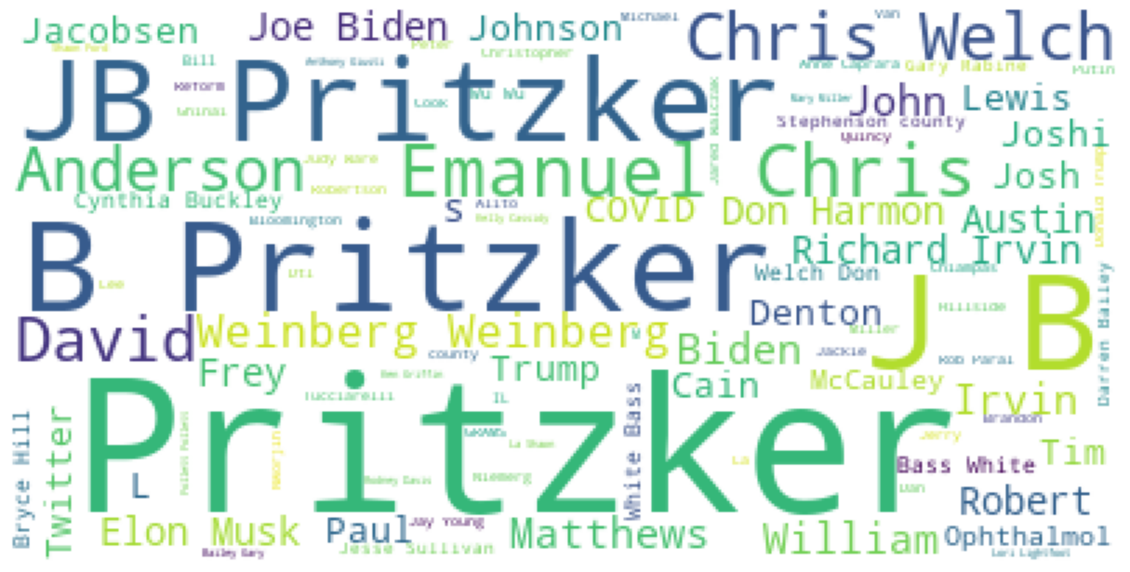

In [130]:
stopwords = list(STOPWORDS) + ['https']
ent_org = ' '.join(ssm_sentences['Entities'][ssm_sentences['Labels']=='PERSON'])

ent_org_wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(ent_org)
rcParams['figure.figsize'] = 20, 40
plt.imshow(ent_org_wc)
plt.axis("off")
plt.show()

#### NORP (Nationalities, or Religious/Political Groups

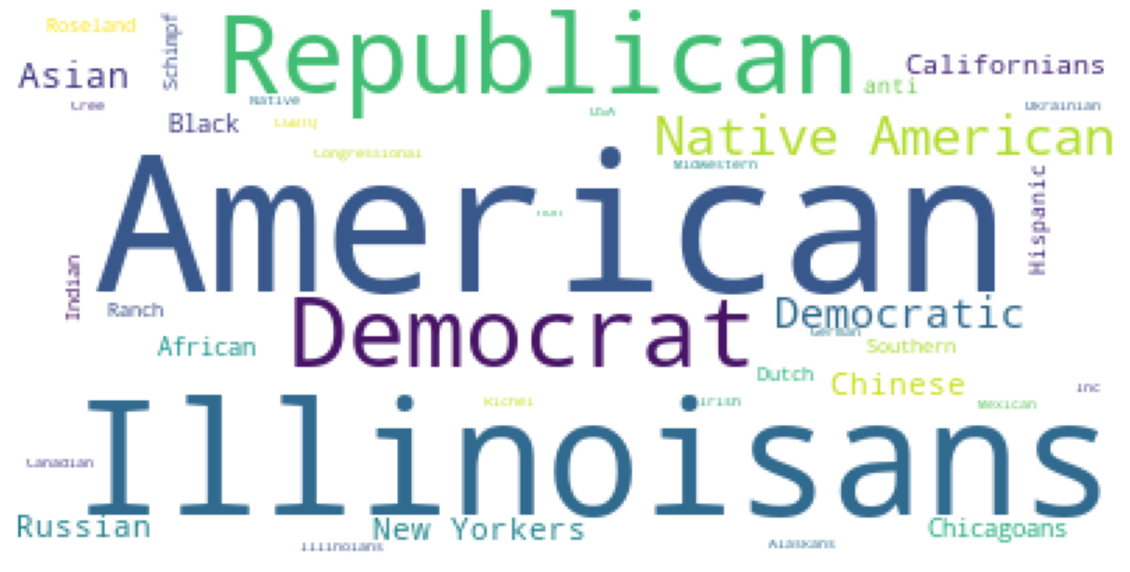

In [131]:
stopwords = list(STOPWORDS) + ['https']
ent_org = ' '.join(ssm_sentences['Entities'][ssm_sentences['Labels']=='NORP'])

ent_org_wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(ent_org)
rcParams['figure.figsize'] = 20, 40
plt.imshow(ent_org_wc)
plt.axis("off")
plt.show()

#### LOC (Location)

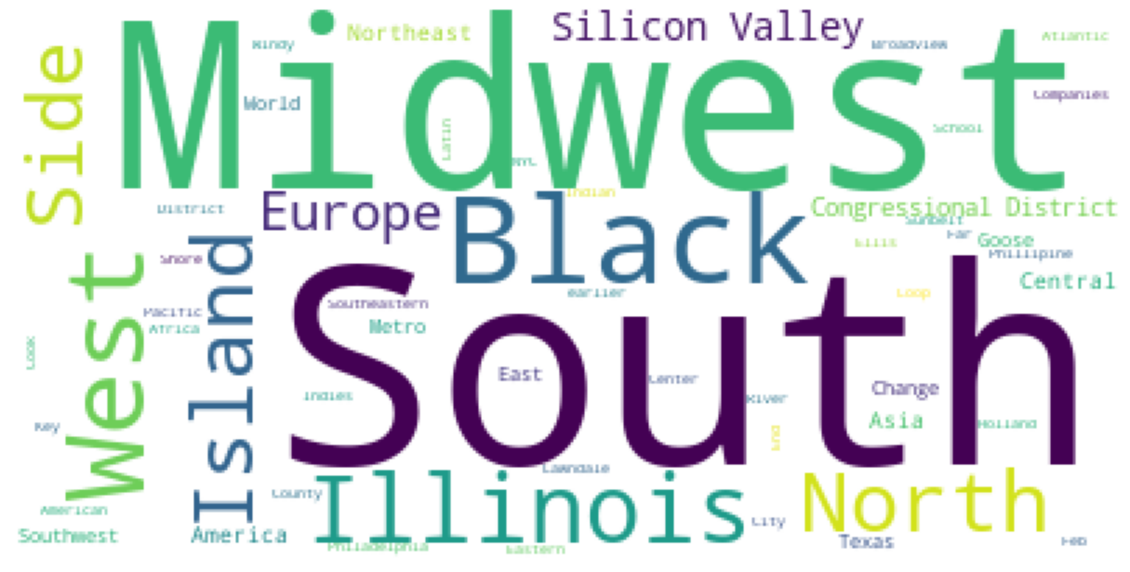

In [132]:
stopwords = list(STOPWORDS) + ['https']
ent_org = ' '.join(ssm_sentences['Entities'][ssm_sentences['Labels']=='LOC'])

ent_org_wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(ent_org)
rcParams['figure.figsize'] = 20, 40
plt.imshow(ent_org_wc)
plt.axis("off")
plt.show()

#### GPE (Geo Political Entities)

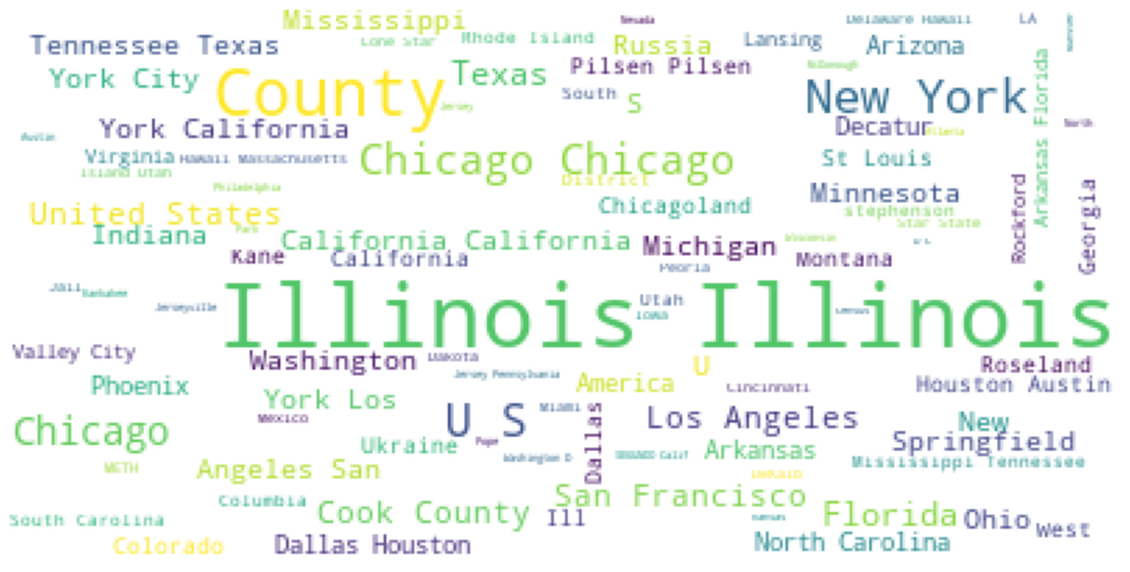

In [133]:
stopwords = list(STOPWORDS) + ['https']
ent_org = ' '.join(ssm_sentences['Entities'][ssm_sentences['Labels']=='GPE'])

ent_org_wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(ent_org)
rcParams['figure.figsize'] = 20, 40
plt.imshow(ent_org_wc)
plt.axis("off")
plt.show()

#### FAC (Facility/Building)

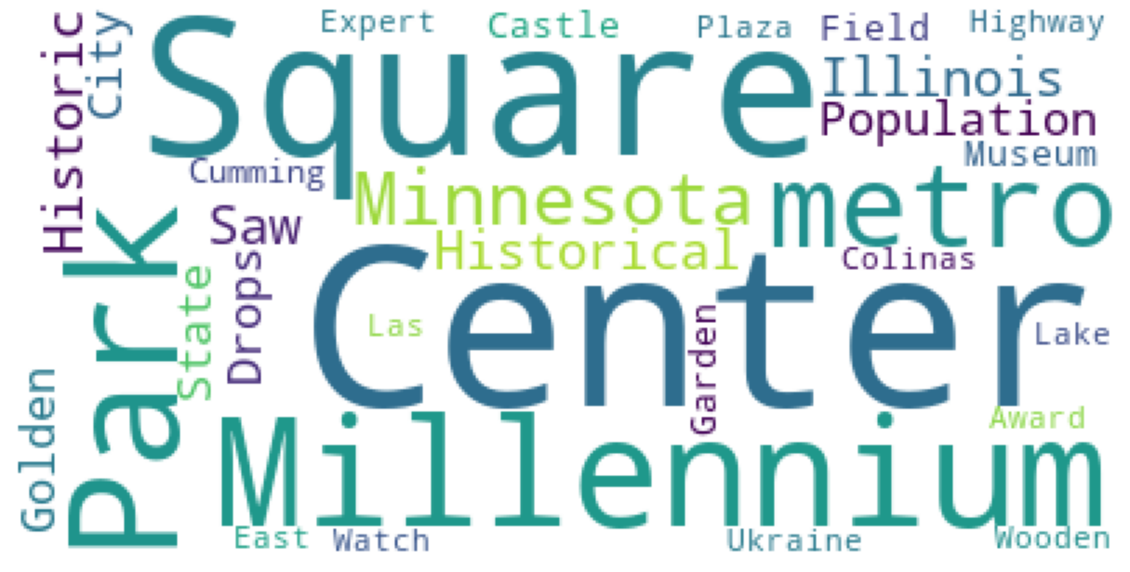

In [134]:
stopwords = list(STOPWORDS) + ['https']
ent_org = ' '.join(ssm_sentences['Entities'][ssm_sentences['Labels']=='FAC'])

ent_org_wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(ent_org)
rcParams['figure.figsize'] = 20, 40
plt.imshow(ent_org_wc)
plt.axis("off")
plt.show()

### 16. Visualizing World Cloud of Entities based on Sentiments

#### Positive Sentiments

In [135]:
all_sentences_pos = ' '.join(df_title_spacy_exp2['txt_sent'][df_title_spacy_exp2['vader_sent_rev']=='pos'])
nlp = ssm
ssm_sent_pos = ner_spacy(all_sentences_pos)

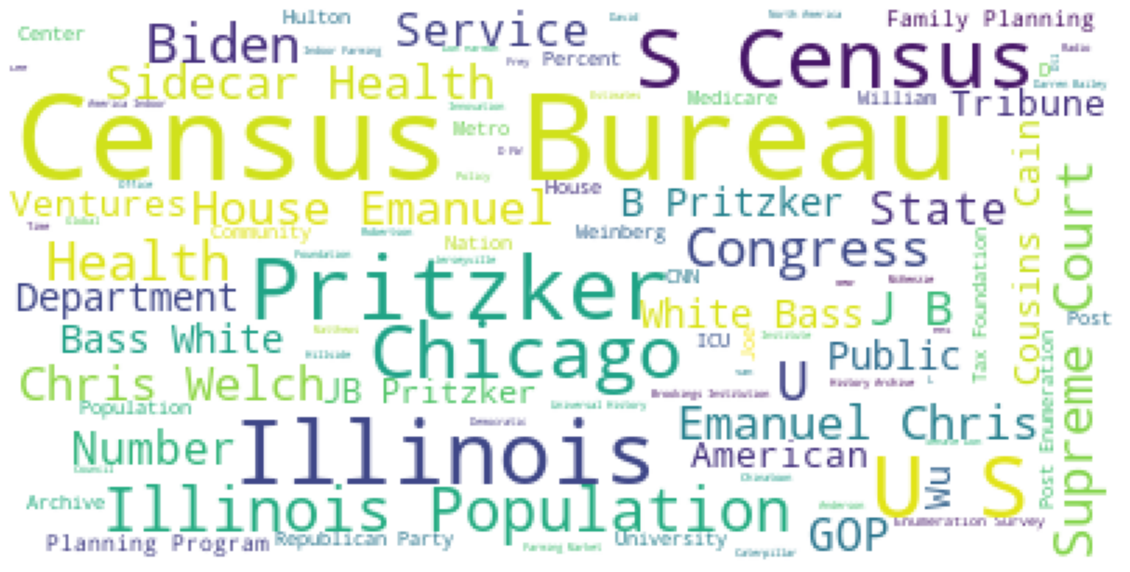

In [136]:
stopwords = list(STOPWORDS)
ent_org = ' '.join(ssm_sent_pos['Entities'][(ssm_sent_pos['Labels']=='ORG') &(ssm_sent_pos['Labels']=='ORG')|(ssm_sent_pos['Labels']=='PERSON')])

ent_org_wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(ent_org)
rcParams['figure.figsize'] = 20, 40
plt.imshow(ent_org_wc)
plt.axis("off")
plt.show()

In [137]:
ssm_sent_pos['Entities'][(ssm_sent_pos['Labels']=='ORG') & (ssm_sent_pos['Labels']=='ORG') |( ssm_sent_pos['Labels']=='PERSON')].value_counts()[:20]

Pritzker                                20
the U.S. Census Bureau                  14
Congress                                 9
the 2020 Census                          7
Sidecar Health                           6
the US Census Bureau                     6
GOP                                      6
the Census Bureau                        6
White Bass                               6
JB Pritzker                              5
Biden                                    5
Census Bureau                            5
J.B. Pritzker                            5
Wu                                       5
the Illinois Family Planning Program     4
Supreme Court                            4
the Supreme Court                        4
House                                    4
ICU                                      4
Weinberg                                 4
Name: Entities, dtype: int64

In [138]:
all_sentences_neg = ' '.join(df_title_spacy_exp2['txt_sent'][df_title_spacy_exp2['vader_sent_rev']=='neg'])
nlp = ssm
ssm_sent_neg = ner_spacy(all_sentences_neg)

#### Negative Sentiments

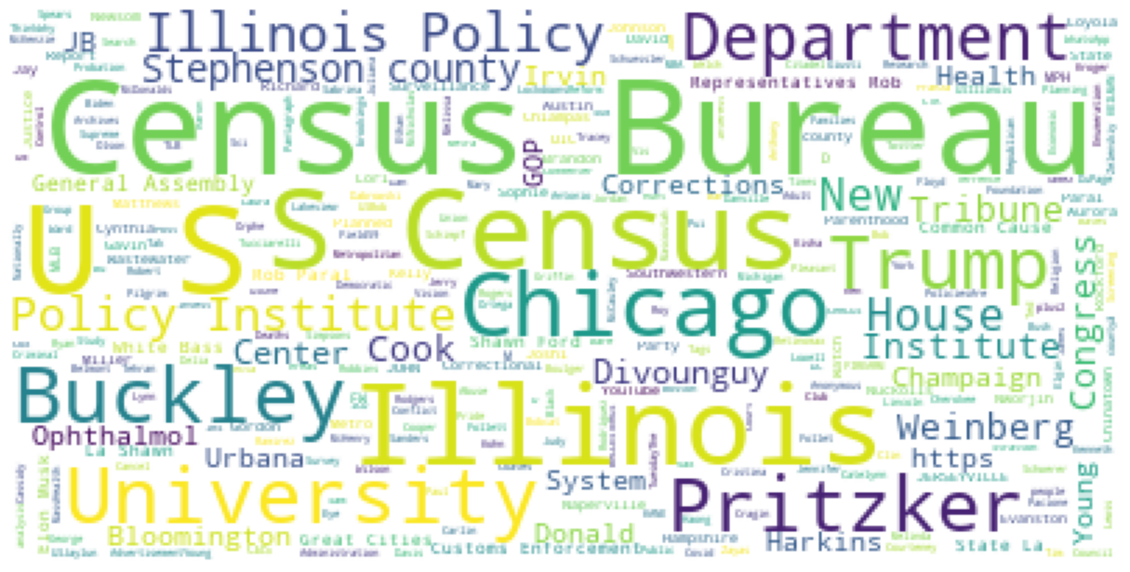

In [139]:
stopwords = list(STOPWORDS)
ent_org = ' '.join(ssm_sent_neg['Entities'][(ssm_sent_neg['Labels']=='ORG') &(ssm_sent_neg['Labels']=='ORG')|(ssm_sent_neg['Labels']=='PERSON')])

ent_org_wc = WordCloud(stopwords=stopwords,background_color="white", max_words=1000).generate(ent_org)
rcParams['figure.figsize'] = 20, 40
plt.imshow(ent_org_wc)
plt.axis("off")
plt.show()

#### Text Observation to Understand Context and Extract Insights

In [140]:
ssm_sent_neg['Entities'][(ssm_sent_neg['Labels']=='ORG') & (ssm_sent_neg['Labels']=='ORG') |( ssm_sent_neg['Labels']=='PERSON')].value_counts()[:20]

U.S. Census Bureau                    9
Buckley                               8
the U.S. Census Bureau                8
the Census Bureau                     5
Trump                                 5
the Illinois Policy Institute         5
Pritzker                              5
Weinberg                              4
Stephenson county                     4
The Census Bureau                     4
The U.S. Census Bureau                4
State                                 4
Donald Trump                          3
the University of Illinois Chicago    3
Rob Paral                             3
the U.S. House of Representatives     3
the General Assembly                  3
White Bass                            3
Divounguy                             3
Elon Musk                             3
Name: Entities, dtype: int64

In [141]:
df_title_spacy_exp2['txt_sent'][df_title_spacy_exp2['txt_sent'].str.contains('Elon|Musk')]

617     Anecdotally, Elon Musk, the country’s largest individual taxpayer, famously made good on his threat to move out of California over COVID-19 regulations , and many others have also left the state for similar reasons.
1071             Among the famous Californians fleeing to Austin are Tesla and SpaceX boss Elon Musk, who swapped the Golden State for the Lone Star State over Governor Gavin Newsom’s punitive COVID rules, and higher taxes.
1558                  Famous Californians fleeing to Austin include Tesla and SpaceX boss Elon Musk, who left the Golden State for the Lone Star State due to Governor Gavin Newsom’s punitive COVID rules and increased taxes.
1798              Interestingly, Elon Musk, the largest single taxpayer in the United States, made good on his threat to leave California due to Covid-19 rules, and many other people also left the state for similar reasons.
2089              Interestingly, Elon Musk, the biggest taxpayer in the United States, followed through 

In [142]:
df_title_spacy_exp2[['title','txt_sent']][df_title_spacy_exp2['txt_sent'].str.contains('Trump')]

title  \
27                               New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
30                               New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
459                                                                   Illinois undercounted in 2020 census, actually recorded largest population ever   
469   The population of Illinois is growing. The census showed it shrinking. It’s one of six states significantly undercounted in 2020. - MarketWatch   
816                                               Pritzker sets a new record of over 11M Illinois tax dollars to prevent low-income population growth   
824                                               Pritzker sets a new record of over 11M Illinois tax dollars to prevent low-income population growth   
825                                               Pritzker sets a new record of over 11M Illinois tax dollars to prevent low-income population growth   
869                              New census figures show Illinois’ population change was actually a modest gain, but experts say warning signs remain   
1461                            Illinois Undercounted in 2020 Census, Actually Grew to 13 Million — The State’s Largest Population Ever – NBC Chicago   
2378                                                      Illinois undercounted in 2020 census, actually grew to 13 million — largest population ever   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   txt_sent  
27                                                                                                                                                                                                                                                                                                                                                                                                      Not only did it take place during the early months of the pandemic, but some potential respondents were alarmed by the Trump administration’s insistence on a question about citizenship, she said.  
30                                                                                                                                                                                                                                                                                                                                                 “We noticed that every time the (citizenship question) came up in a lawsuit or every time Trump would say something about the census or the citizenship question, our community partners would get questions from people filling out the form,” he said.  
459                                                                                                                                                                                                                                                               "Jay Young, executive director of Common Cause Illinois, said the undercount was to be expected due to the public health crisis and former President Donald Trump’s attempts to disrupt the census."We had the former administration working to undercut the efforts of the census bureau and people were rightfully scared," Young said.  
469   From the archives (January 2022): Census challenges emerge, alongside new insight into Trump a

In [143]:
df_title_spacy_exp2[['title','txt_sent']][df_title_spacy_exp2['txt_sent'].str.contains('Sidecar Health')]

title  \
1969    Sidecar Health Launches in Illinois, is available to more than half of the US population   
1970    Sidecar Health Launches in Illinois, is available to more than half of the US population   
1972    Sidecar Health Launches in Illinois, is available to more than half of the US population   
1976    Sidecar Health Launches in Illinois, is available to more than half of the US population   
1977    Sidecar Health Launches in Illinois, is available to more than half of the US population   
1980    Sidecar Health Launches in Illinois, is available to more than half of the US population   
1981    Sidecar Health Launches in Illinois, is available to more than half of the US population   
1983    Sidecar Health Launches in Illinois, is available to more than half of the US population   
1984    Sidecar Health Launches in Illinois, is available to more than half of the US population   
1987    Sidecar Health Launches in Illinois, is available to more than half of the US population   
2468  Sidecar Health Launches in Illinois, is available to more than half of the U.S. population   
2469  Sidecar Health Launches in Illinois, is available to more than half of the U.S. population   
2470  Sidecar Health Launches in Illinois, is available to more than half of the U.S. population   
2472  Sidecar Health Launches in Illinois, is available to more than half of the U.S. population   
2475  Sidecar Health Launches in Illinois, is available to more than half of the U.S. population   
2476  Sidecar Health Launches in Illinois, is available to more than half of the U.S. population   
2477  Sidecar Health Launches in Illinois, is available to more than half of the U.S. population   
2478  Sidecar Health Launches in Illinois, is available to more than half of the U.S. population   

                                                                                                                                                                                                                                                                                                                              txt_sent  
1969  Sidecar Health’s Access Plan is now available in 18 statesEL SEGUNDO, Calif., March 01, 2022 (GLOBE NEWSWIRE) – Sidecar Health, the health insurer dedicated to providing simple and transparent health insurance options based on doctors’ cash prices, announced it’s now available to consumers in Illinois, its 18th state .  
1970                                                                                                                                                                                With the addition of Illinois, Sidecar Health is now an option for more than half of the US population, marking a major milestone for the company.  
1972                                                                                                                                                                                   Sidecar Health is changing that, with affordable, straightforward, accessible plans, ”said Patrick Quigley, Co-Founder and CEO, Sidecar Health.  
1976                                                                                                       With the Sidecar Health app members can look up the local prices for any medical service in just a few clicks, so they know upfront what they’ll pay for care, and can shop around for the doctor that makes sense to them.  
1977                                                                                                                                         Since Sidecar Health members can visit any doctor who accepts a Visa card, they no longer have to wonder if a doctor is in-network or not – Sidecar Health covers all providers the same.  
1980                                                                                                                                                                                                              With t

In [144]:
df_title_spacy_exp2[['title','txt_sent']][df_title_spacy_exp2['txt_sent'].str.contains('Medicare')]

title  \
508                                           Pritzker promotes false narrative of Illinois population 'boom'   
533   Gov. Pritzker calls on federal government to consider Illinois population growth when providing funding   
740               Governor Pritzker Calls on Federal Government to Fund Illinois Based on Population Increase   
1438                   Gov Pritzker Calls On Federal Government to Fund Illinois Based on Population Increase   
2000         Aging in the shadows: Spotlighting the challenges facing Illinois’ aging undocumented population   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      txt_sent  
508   Because these estimates use the latest decennial census count as their starting point, PEP estimates of Illinois’ population on April 1, 2020, match the official count of 12,812,508.This program is also intended to track changes in the population based on: federal vital statistics data from the National Center for Health Statistics and Federal-State Cooperative for Population Estimates; domestic migration data from the Internal Revenue Service, Medicare, Social Security Administration and the Census Bureau’s Demographic Characteristics File for all ages; and international migration data from the American Community Survey, Puerto Rico Community Survey and the Defense Manpower Data Center.  
533                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    The governor’s letter to President Joe Biden calls for an adjustment in population count as the government allocates $1.5 million for programs like Medicare, affordable housing and homeland security.  
740                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Pritzker’s letter to President Biden calls for adjusted population counts to be considered when allocating over $1.5 trillion in federal funds for Medicare, affordable housing, homeland security, and other essential programs.  
1438                                                                                                                                                                                                                                                                                                                                                                                                                                                                Pritzker sent a letter to President Biden calling for adjusted population counts to be considered when allocating over one-point-five-trillion-dollars in

### End of Notebook. Please refer to the presentation for complete interpretations/analysis/insights.